Import Libraries
------------------------

In [2]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_columns = None
#import pandas_profiling
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style as style
import plotly.express as px
import os
from time import time
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
import matplotlib.pyplot as plt
import numpy as np
from imblearn.pipeline import Pipeline, make_pipeline
from sklearn.model_selection import KFold
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.neural_network import MLPClassifier
#from sklearn.pipeline import Pipeline

Import the Dataset (Data Source: https://archive.ics.uci.edu/ml/datasets/default%20of%20credit%20card%20clients)

In [3]:
#Importing the Credit Card Dataset
CardData=pd.read_csv('UCI_Credit_Card.csv')

Data Preprocessing
--------------------

In [4]:
print("Customer Credit Card Default Data -  Rows:{0} Columns:{1}".format(CardData.shape[0],CardData.shape[1]))

Customer Credit Card Default Data -  Rows:30000 Columns:25


In [5]:
CardData.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [6]:
CardData.dtypes

ID                              int64
LIMIT_BAL                     float64
SEX                             int64
EDUCATION                       int64
MARRIAGE                        int64
AGE                             int64
PAY_0                           int64
PAY_2                           int64
PAY_3                           int64
PAY_4                           int64
PAY_5                           int64
PAY_6                           int64
BILL_AMT1                     float64
BILL_AMT2                     float64
BILL_AMT3                     float64
BILL_AMT4                     float64
BILL_AMT5                     float64
BILL_AMT6                     float64
PAY_AMT1                      float64
PAY_AMT2                      float64
PAY_AMT3                      float64
PAY_AMT4                      float64
PAY_AMT5                      float64
PAY_AMT6                      float64
default.payment.next.month      int64
dtype: object

In [7]:
CardData[['LIMIT_BAL','SEX','EDUCATION','MARRIAGE','AGE','default.payment.next.month']].describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,0.221200
std,129747.661567,0.489129,0.790349,0.521970,9.217904,0.415062
min,10000.000000,1.000000,0.000000,0.000000,21.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,1.000000


In [8]:
CardData[['PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']].describe()

,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100
std,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988
min,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000


In [9]:
CardData[['PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']].describe()

,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000
mean,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567
std,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775
min,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000
25%,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000
50%,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000
75%,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000
max,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000


In [10]:
CardData[['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6']].describe()

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
count,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000
mean,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400
std,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537
min,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000
25%,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000
50%,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000
75%,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000
max,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000


In [11]:
#looking for Missing Values in each column

columns=CardData.columns.values

for col in columns:
    print("Column Name : {}".format(col))
    print("Null Values : {}".format(CardData[col].isnull().sum()))
    print("NaN Values : {}".format(CardData[col].isna().sum()))
    print('*******************************************')
    
#Observation :There are no missing values in the dataset

Column Name : ID
Null Values : 0
NaN Values : 0
*******************************************
Column Name : LIMIT_BAL
Null Values : 0
NaN Values : 0
*******************************************
Column Name : SEX
Null Values : 0
NaN Values : 0
*******************************************
Column Name : EDUCATION
Null Values : 0
NaN Values : 0
*******************************************
Column Name : MARRIAGE
Null Values : 0
NaN Values : 0
*******************************************
Column Name : AGE
Null Values : 0
NaN Values : 0
*******************************************
Column Name : PAY_0
Null Values : 0
NaN Values : 0
*******************************************
Column Name : PAY_2
Null Values : 0
NaN Values : 0
*******************************************
Column Name : PAY_3
Null Values : 0
NaN Values : 0
*******************************************
Column Name : PAY_4
Null Values : 0
NaN Values : 0
*******************************************
Column Name : PAY_5
Null Values : 0
NaN Values

In [4]:
#Data Cleaning
#Rename the columns 'default.payment.next.month' and 'PAY_0'
CardData = CardData.rename(columns={'default.payment.next.month': 'Default', 
                        'PAY_0': 'PAY_1'})
CardData.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'Default'],
      dtype='object')

Univariant Analysis
----------------------------

In [6]:
#Distribution of the Class variable
CardData['Default'].value_counts()
#Observation :Non-Default customers - 23364, Default customers - 6636; 

0    23364
1     6636
Name: Default, dtype: int64

In [14]:
CardData.Default.sum() / len(CardData.Default)
#Observation :22.12% are default customers

0.2212

In [15]:
#Categorical Variables
CardData['SEX'].value_counts()
#Observation :There are more female credit card holders than men

2    18112
1    11888
Name: SEX, dtype: int64

In [16]:
CardData['EDUCATION'].value_counts()
#Observation :There are undefined values 0, 5, 6

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

In [17]:
CardData['MARRIAGE'].value_counts()
#Observation :There is an undefined value 0

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

In [18]:
# Repayment Status

paycolumns=CardData[['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']]

for p in paycolumns:
    print("Column Name : {}".format(p))
    print("Unique Values : {}".format(CardData[p].value_counts()))
    print('*******************************************')

Column Name : PAY_1
Unique Values :  0    14737
-1     5686
 1     3688
-2     2759
 2     2667
 3      322
 4       76
 5       26
 8       19
 6       11
 7        9
Name: PAY_1, dtype: int64
*******************************************
Column Name : PAY_2
Unique Values :  0    15730
-1     6050
 2     3927
-2     3782
 3      326
 4       99
 1       28
 5       25
 7       20
 6       12
 8        1
Name: PAY_2, dtype: int64
*******************************************
Column Name : PAY_3
Unique Values :  0    15764
-1     5938
-2     4085
 2     3819
 3      240
 4       76
 7       27
 6       23
 5       21
 1        4
 8        3
Name: PAY_3, dtype: int64
*******************************************
Column Name : PAY_4
Unique Values :  0    16455
-1     5687
-2     4348
 2     3159
 3      180
 4       69
 7       58
 5       35
 6        5
 8        2
 1        2
Name: PAY_4, dtype: int64
*******************************************
Column Name : PAY_5
Unique Values :  0    16947


Data Cleaning
--------------------

In [5]:
#Remove the ID field from the dataset, since this is not essential for our Data Analysis
CardData.drop('ID',axis=1,inplace=True)

In [22]:
CardData.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'Default'],
      dtype='object')

In [6]:
# Changing values of the Education field which are 0,5,6 (unknown) to 4(Others)
CardData['EDUCATION']=CardData['EDUCATION'].apply(lambda ed: ed
                                                  if (ed>0 and ed<4) 
                                                      else 4)

In [24]:
CardData['EDUCATION'].unique()

array([2, 1, 3, 4], dtype=int64)

In [7]:
# Changing values of the Marriage field which are 0(unknown) to 3(Others)
CardData['MARRIAGE']=CardData['MARRIAGE'].apply(lambda mar: mar
                                                  if (mar>0 and mar<3) 
                                                      else 3)

In [26]:
CardData['MARRIAGE'].unique()

array([1, 2, 3], dtype=int64)

In [8]:
#Changing values of payment status fields which are -1 and -2 to 0
fil = (CardData.PAY_1 == -1) | (CardData.PAY_1==-2)
CardData.loc[fil,'PAY_1']=0

fil = (CardData.PAY_2 == -1) | (CardData.PAY_2==-2)
CardData.loc[fil,'PAY_2']=0

fil = (CardData.PAY_3 == -1) | (CardData.PAY_3==-2)
CardData.loc[fil,'PAY_3']=0

fil = (CardData.PAY_4 == -1) | (CardData.PAY_4==-2)
CardData.loc[fil,'PAY_4']=0

fil = (CardData.PAY_5 == -1) | (CardData.PAY_5==-2)
CardData.loc[fil,'PAY_5']=0

fil = (CardData.PAY_6 == -1) | (CardData.PAY_6==-2)
CardData.loc[fil,'PAY_6']=0

In [28]:
CardData.PAY_1.value_counts()

0    23182
1     3688
2     2667
3      322
4       76
5       26
8       19
6       11
7        9
Name: PAY_1, dtype: int64

In [29]:
CardData.PAY_2.value_counts()

0    25562
2     3927
3      326
4       99
1       28
5       25
7       20
6       12
8        1
Name: PAY_2, dtype: int64

In [30]:
CardData.PAY_3.value_counts()

0    25787
2     3819
3      240
4       76
7       27
6       23
5       21
1        4
8        3
Name: PAY_3, dtype: int64

In [31]:
CardData.PAY_4.value_counts()

0    26490
2     3159
3      180
4       69
7       58
5       35
6        5
8        2
1        2
Name: PAY_4, dtype: int64

In [32]:
CardData.PAY_5.value_counts()

0    27032
2     2626
3      178
4       84
7       58
5       17
6        4
8        1
Name: PAY_5, dtype: int64

In [33]:
CardData.PAY_6.value_counts()

0    26921
2     2766
3      184
4       49
7       46
6       19
5       13
8        2
Name: PAY_6, dtype: int64

In [9]:
CD2=CardData.copy()

In [35]:
CD2.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'Default'],
      dtype='object')

Data Visualization
-------------
Univariant analysis of the categorical variables was done in Tableau 
https://public.tableau.com/profile/jes7092#!/vizhome/UnivariantAnalysis-1/Dashboard1?publish=yes


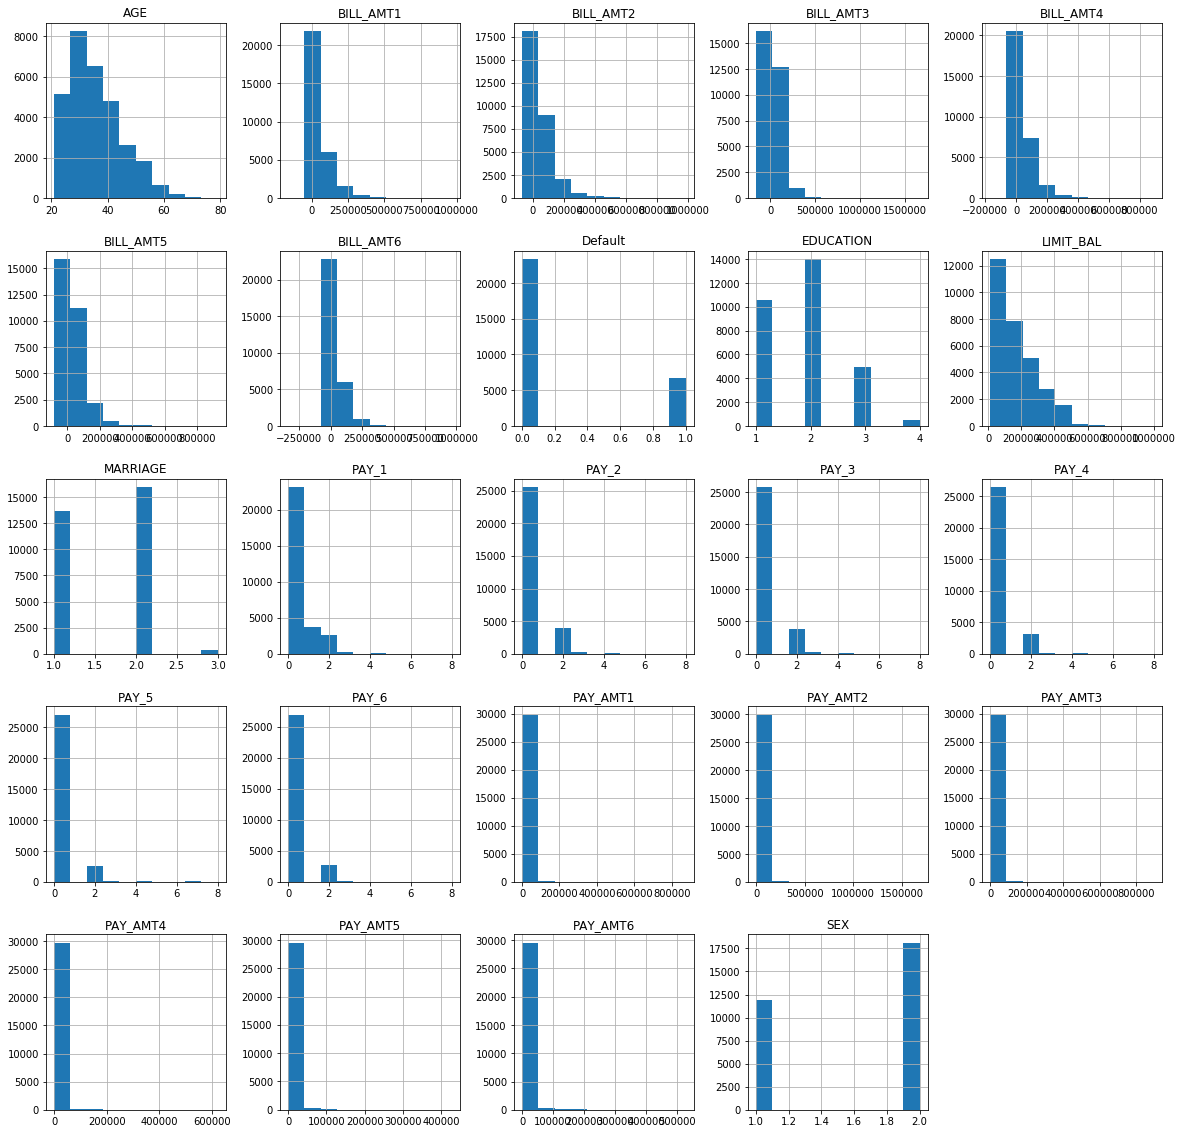

In [36]:
CardData.hist(figsize = (20, 20))
plt.show()

In [37]:
## Default Percentage
def calculate_percentage (total, default_count,label):
    print ("Percentage of {} is {} %".format(label,round(((default_count * 100) / total),2)))

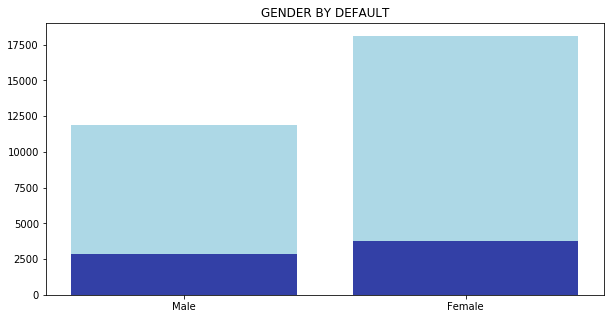

Percentage of Male Default is 24.17 %
Percentage of Female Default is 20.78 %


In [38]:
# Gender distribution by the class variable (Default)
# male = 1 , female = 2

male= CardData['SEX'][CardData['SEX']==1].count()
male_default = CardData['SEX'][(CardData['SEX']==1)&(CardData['Default']==1)].count()

female=CardData['SEX'][CardData['SEX']==2].count()
female_default = CardData['SEX'][(CardData['SEX']==2)&(CardData['Default']==1)].count()

gender_total = [male,female]
default_gender_total = [male_default,female_default]

plt.figure(figsize=(10,5))
plt.bar([0,1],gender_total, color='lightblue')
plt.bar([0,1],default_gender_total, color='darkblue',alpha = 0.7)
plt.xticks([0,1],['Male','Female'])
plt.title('GENDER BY DEFAULT')
plt.show()

print ("Percentage of {} is {} %".format("Male Default",round(((male_default * 100) / male),2)))
print ("Percentage of {} is {} %".format("Female Default",round(((female_default * 100) / female),2)))

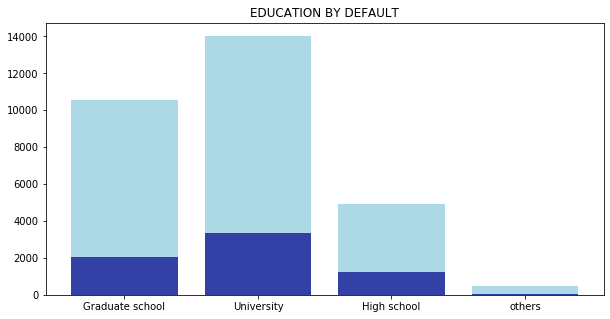

Percentage of Graduate school Default is 19.23 %
Percentage of University Default is 23.73 %
Percentage of High school Default is 25.16 %
Percentage of Others Default is 7.05 %


In [39]:
# Education distribution by the class variable (Default)
#(1 = graduate school; 2 = university; 3 = high school; 4 = others)

graduate= CardData['EDUCATION'][CardData['EDUCATION']==1].count()
graduate_default = CardData['EDUCATION'][(CardData['EDUCATION']==1)&(CardData['Default']==1)].count()

university= CardData['EDUCATION'][CardData['EDUCATION']==2].count()
university_default = CardData['EDUCATION'][(CardData['EDUCATION']==2)&(CardData['Default']==1)].count()

high_sc= CardData['EDUCATION'][CardData['EDUCATION']==3].count()
high_sc_default = CardData['EDUCATION'][(CardData['EDUCATION']==3)&(CardData['Default']==1)].count()

others= CardData['EDUCATION'][CardData['EDUCATION']==4].count()
others_default = CardData['EDUCATION'][(CardData['EDUCATION']==4)&(CardData['Default']==1)].count()

educ_total = [graduate,university,high_sc,others]
default_educ_total=  [graduate_default,university_default,high_sc_default,others_default] 

plt.figure(figsize=(10,5))
plt.bar([1,2,3,4] , educ_total,color='lightblue')
plt.bar([1,2,3,4] , default_educ_total,color='darkblue', alpha = 0.7)
plt.xticks([1,2,3,4],['Graduate school','University','High school','others'])
plt.title('EDUCATION BY DEFAULT')
plt.show()

print ("Percentage of {} is {} %".format("Graduate school Default",round(((graduate_default * 100) / graduate ),2)))
print ("Percentage of {} is {} %".format("University Default",round(((university_default * 100) / university),2)))
print ("Percentage of {} is {} %".format("High school Default",round(((high_sc_default * 100) / high_sc),2)))
print ("Percentage of {} is {} %".format("Others Default",round(((others_default * 100) / others),2)))

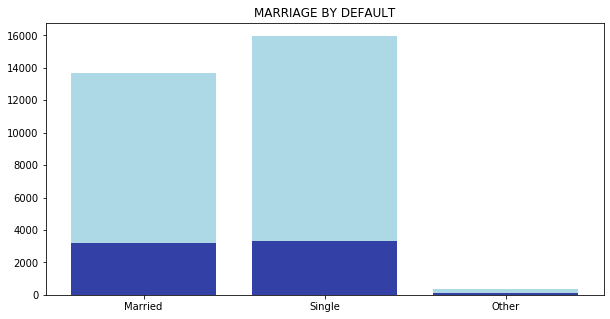

Percentage of Married Default is 23.47 %
Percentage of Single Default is 20.93 %
Percentage of Others Default is 23.61 %


In [40]:
# Marriage distribution by class variable (Default)
# 1=married, 2=single, 3=others

married= CardData['MARRIAGE'][CardData['MARRIAGE']==1].count()
married_default = CardData['MARRIAGE'][(CardData['MARRIAGE']==1)&(CardData['Default']==1)].count()

single=CardData['MARRIAGE'][CardData['MARRIAGE']==2].count()
single_default = CardData['MARRIAGE'][(CardData['MARRIAGE']==2)&(CardData['Default']==1)].count()

others=CardData['MARRIAGE'][CardData['MARRIAGE']==3].count()
others_default = CardData['MARRIAGE'][(CardData['MARRIAGE']==3)&(CardData['Default']==1)].count()

marriage_total = [married,single,others]
default_marriage_total = [married_default,single_default,others_default]

plt.figure(figsize=(10,5))
plt.bar([1,2,3],marriage_total, color='lightblue')
plt.bar([1,2,3],default_marriage_total, color='darkblue',alpha = 0.7)
plt.xticks([1,2,3],['Married','Single','Other'])
plt.title('MARRIAGE BY DEFAULT')
plt.show()

print ("Percentage of {} is {} %".format("Married Default",round(((married_default * 100) / married),2)))
print ("Percentage of {} is {} %".format("Single Default",round(((single_default * 100) / single),2)))
print ("Percentage of {} is {} %".format("Others Default",round(((others_default * 100) / others),2)))

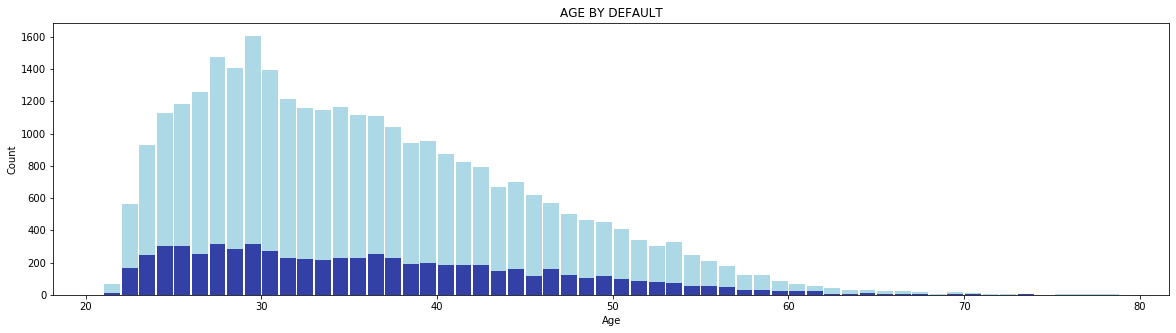

In [41]:
# Age distribution by class variable (Default)

plt.figure(figsize=(20,5))
plt.hist(CardData['AGE'], sorted(CardData['AGE'].unique()),rwidth=0.9, color ='lightblue')
plt.hist(CardData['AGE'][(CardData['Default']==1)], sorted(CardData['AGE'].unique()),rwidth=0.9,color='darkblue',alpha = 0.7)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('AGE BY DEFAULT')
plt.show()

age_persentage_dataframe = pd.DataFrame(columns=['Age', 'Percentage'])


Text(0.5, 1.05, 'BALANCE LIMIT BY DEFAULT')

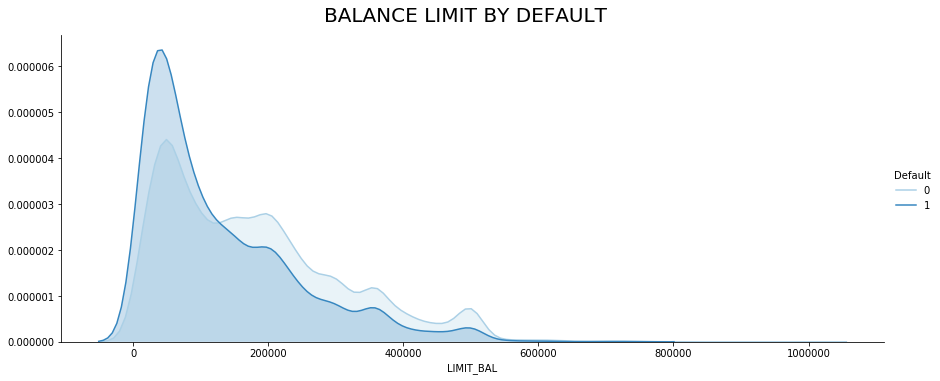

In [42]:
# Limit Balance and Default Rate Distribution
age_survival_dist = sns.FacetGrid(CardData, hue = 'Default', aspect = 2.5, size = 5, palette = 'Blues')
age_survival_dist.map(sns.kdeplot, 'LIMIT_BAL', shade = True)
age_survival_dist.add_legend()
plt.suptitle('BALANCE LIMIT BY DEFAULT', fontsize = 20, y = 1.05)

In [46]:
## takes the variables and add numbers 1 to 6 to the prefix
def getColNames(prefix):
    return [prefix+str(x) for x in range(1,7)]

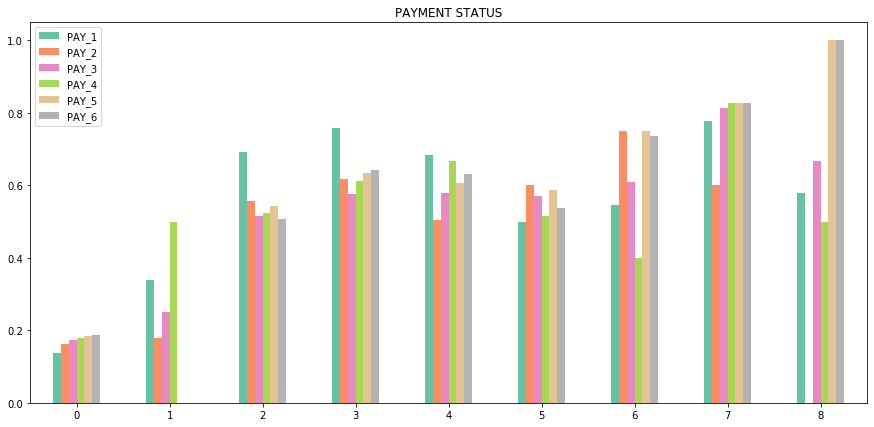

In [47]:
def get_pay_mean(PAY_NUM):
    temp = CardData[[PAY_NUM, 'Default']].groupby([PAY_NUM], as_index = True).mean()
    pay_mean = temp['Default']
    return pay_mean
pay_means = {}
for i in ['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']:
    pay_means[i] = get_pay_mean(i)
pay_means_results = pd.DataFrame(pay_means)
#pay_means_results.reset_index(level=0, inplace=True)
pay_means_results
pay_means_results.plot(kind = 'bar', title = 'PAYMENT STATUS', figsize=(15, 7), legend=True, rot = 0, colormap = 'Set2')

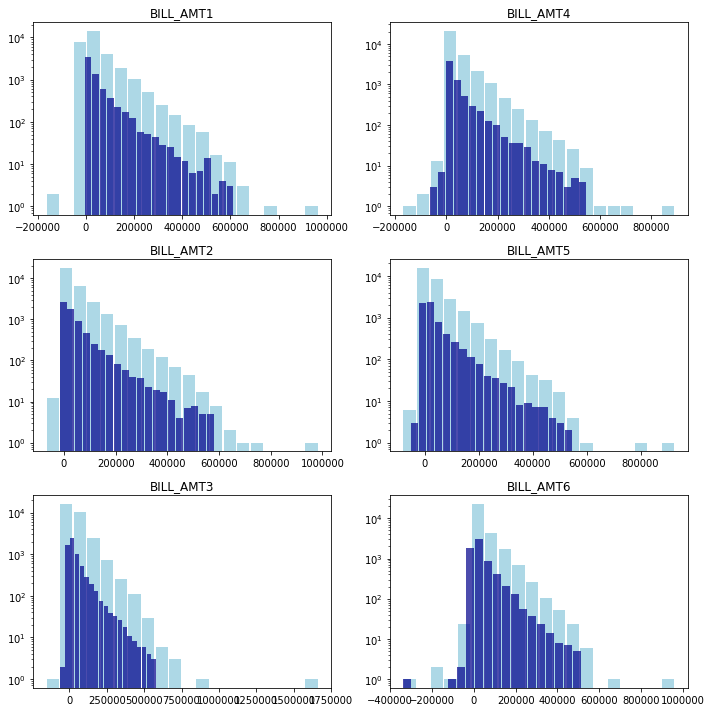

In [48]:
# BILL_AMT1 , BILL_AMT2, BILL_AMT3, BILL_AMT4, BILL_AMT5, BILL_AMT6

bill_cols =  getColNames('BILL_AMT')
figure, ax = plt.subplots(3,2)
figure.set_size_inches(10,10)


for b in range(len(bill_cols)):
    row,col =  b%3, int(b/3)
   
    ax[row,col].hist(CardData[bill_cols[b]], 20,rwidth=0.9, color ='lightblue')
    ax[row,col].hist(CardData[bill_cols[b]][(CardData['Default']==1)],20,rwidth=0.9,color='darkblue',alpha = 0.7)
    ax[row,col].set_title(bill_cols[b])
    
    #adding scaling to graph
    ax[row,col].set_yscale('log', nonposy='clip')
plt.tight_layout()
plt.show()


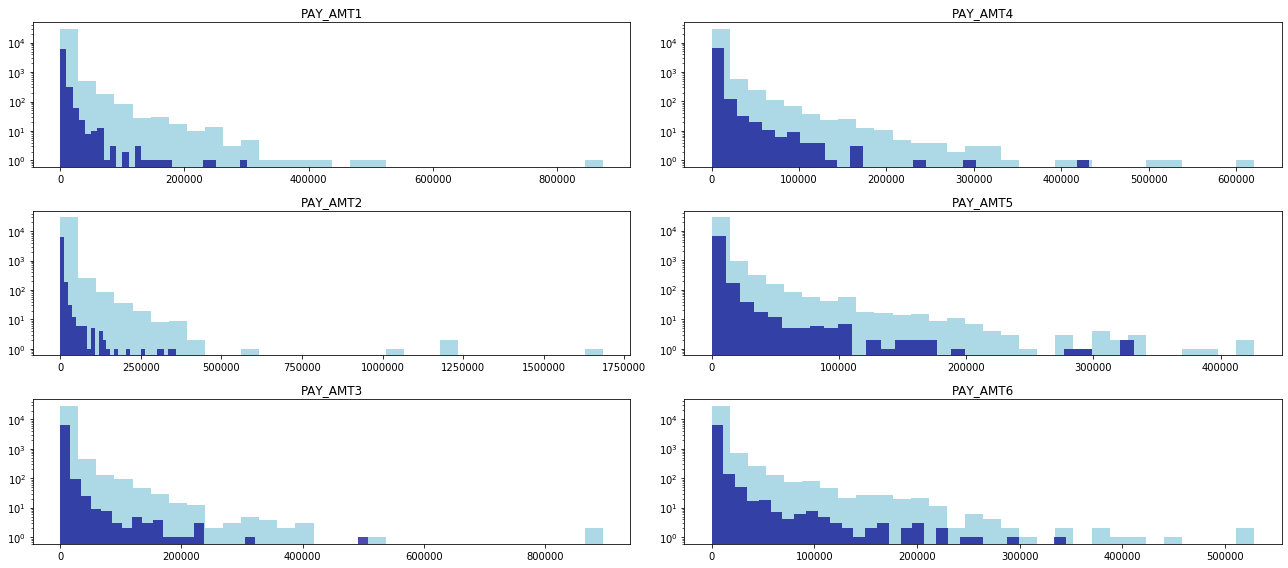

In [49]:
# Distribution of Previous Payment amount by Target
ppay_cols = getColNames('PAY_AMT')
figure, ax = plt.subplots(3,2)
figure.set_size_inches(18,8)


for p in range(len(ppay_cols)):
    row,col =  p%3, int(p/3)
   
    ax[row,col].hist(CardData[ppay_cols[p]], 30, color ='lightblue')
    ax[row,col].hist(CardData[ppay_cols[p]][(CardData['Default']==1)],30,color='darkblue',alpha = 0.7)
    ax[row,col].set_title(ppay_cols[p])
    #adding scaling to graph
    ax[row,col].set_yscale('log', nonposy='clip')
plt.tight_layout()
plt.show()

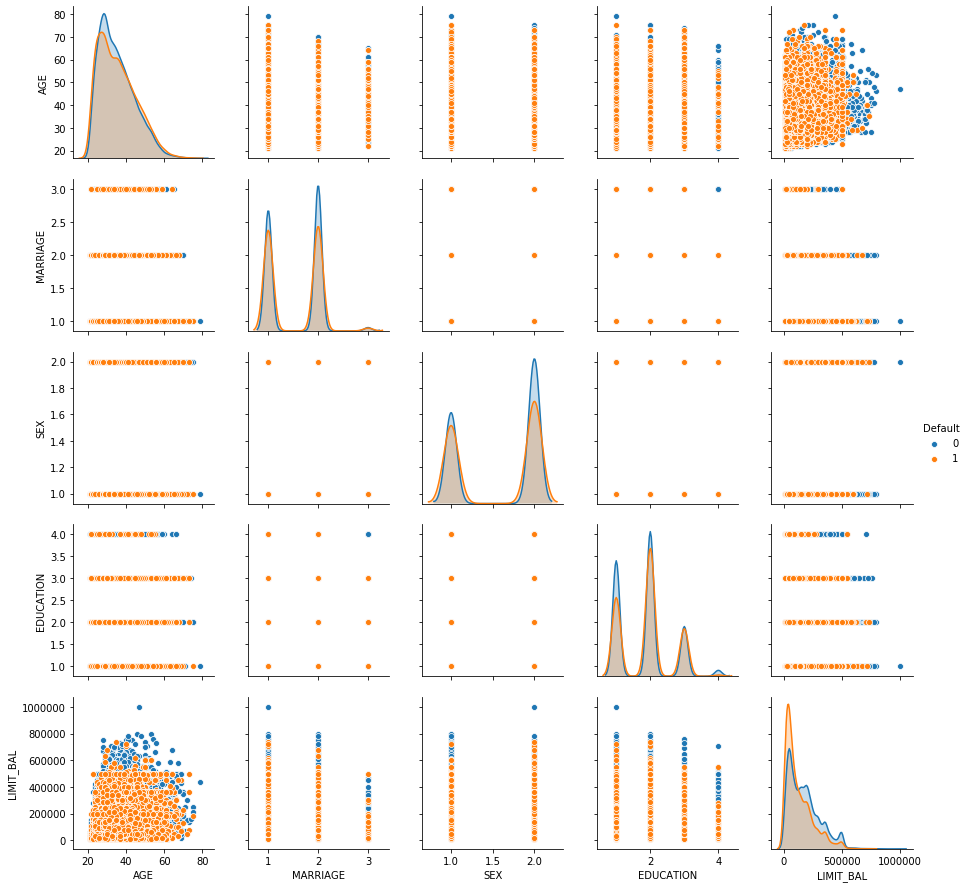

In [45]:
#Distribution between AGE, MARRIAGE, SEX, EDUCATION, LIMIT BALANCE
sns.pairplot(CardData, hue = 'Default', vars = ['AGE', 'MARRIAGE', 'SEX', 'EDUCATION', 'LIMIT_BAL'] )

Correlation
-------------

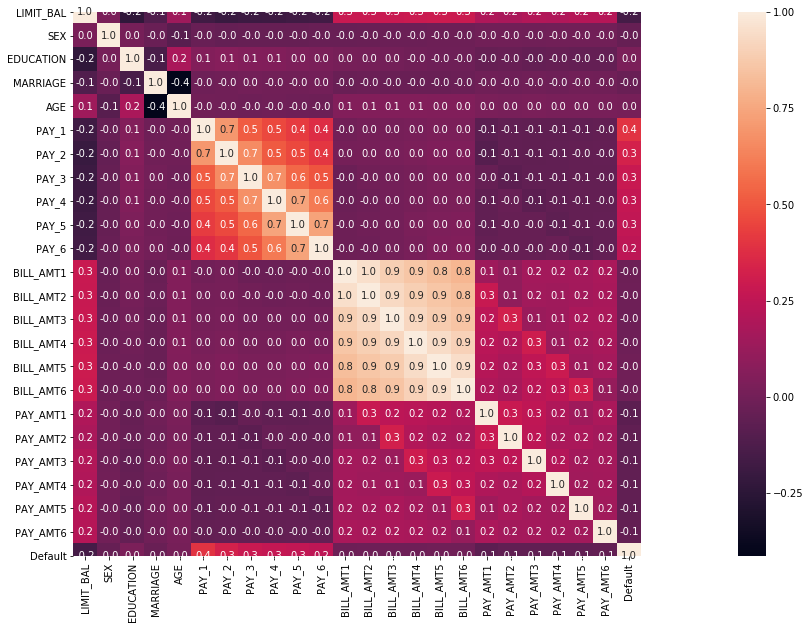

In [50]:
# Correlation Heatmap
#style.use('fivethirtyeight')
#sns.heatmap(CardData.corr())
plt.subplots(figsize=(35,10))
sns.heatmap(CardData.corr(), square=True, annot=True, fmt=".1f" )

In [51]:
#Correlation between every feature and the response

CardData.corr()['Default']


LIMIT_BAL   -0.153520
SEX         -0.039961
EDUCATION    0.033842
MARRIAGE    -0.027575
AGE          0.013890
PAY_1        0.396019
PAY_2        0.327093
PAY_3        0.286999
PAY_4        0.269055
PAY_5        0.260850
PAY_6        0.244437
BILL_AMT1   -0.019644
BILL_AMT2   -0.014193
BILL_AMT3   -0.014076
BILL_AMT4   -0.010156
BILL_AMT5   -0.006760
BILL_AMT6   -0.005372
PAY_AMT1    -0.072929
PAY_AMT2    -0.058579
PAY_AMT3    -0.056250
PAY_AMT4    -0.056827
PAY_AMT5    -0.055124
PAY_AMT6    -0.053183
Default      1.000000
Name: Default, dtype: float64

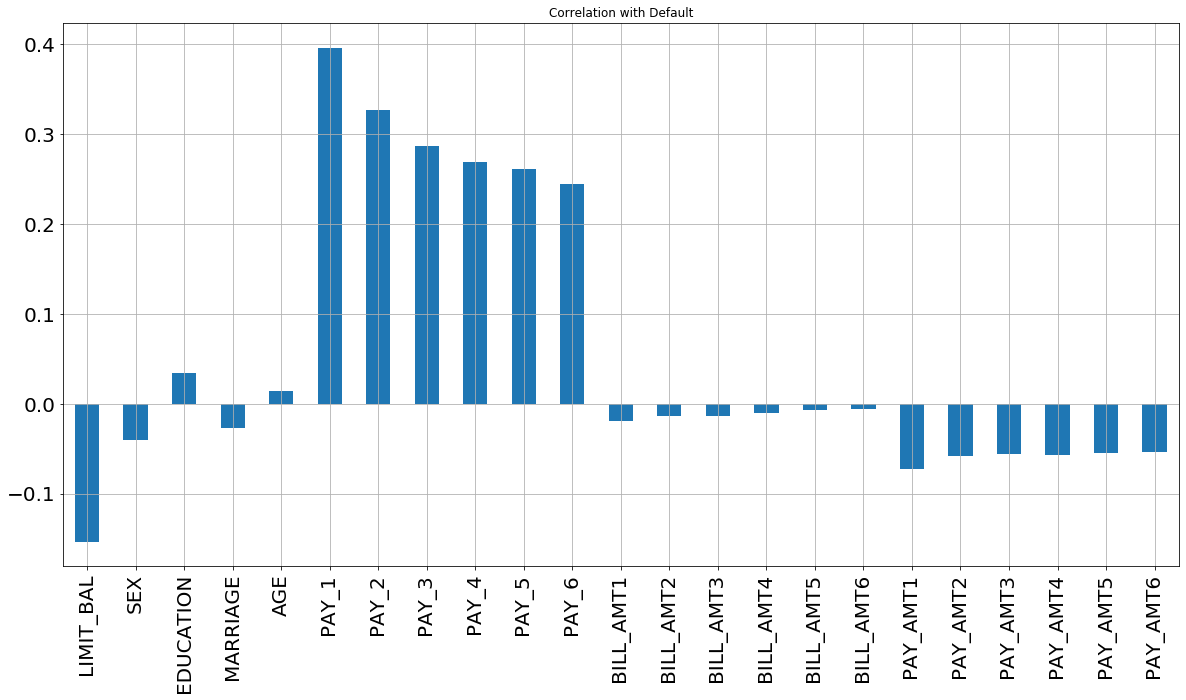

In [56]:
dataset=CardData.copy()
data = dataset.drop(['Default'],axis=1)
target = dataset['Default']

data.corrwith(dataset['Default']).plot.bar(figsize = (20, 10), title = "Correlation with Default", fontsize = 20, rot = 90, grid = True)

Outliers
-------

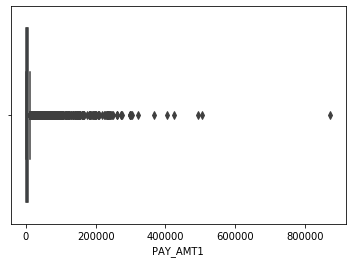

In [57]:
# Outliers
sns.boxplot(x='PAY_AMT1',data=CardData)

In [58]:
#outliers - Z-score function
from scipy import stats

z=np.abs(stats.zscore(CardData))
print(z)
threshold = 3
print(np.where(z>3))
CardData_o=CardData[(z<3).all(axis=1)]
CardData.shape
CardData_o.shape

#Observation:3303 rows have outliers, since it is around 11% and not erroneous we will keep those

[[1.13672015 0.81016074 0.21186989 ... 0.31413612 0.29338206 1.87637834]
 [0.3659805  0.81016074 0.21186989 ... 0.31413612 0.18087821 1.87637834]
 [0.59720239 0.81016074 0.21186989 ... 0.24868274 0.01212243 0.53294156]
 ...
 [1.05964618 1.23432296 0.21186989 ... 0.18322937 0.11900109 1.87637834]
 [0.67427636 1.23432296 1.55508562 ... 3.15253642 0.19190359 1.87637834]
 [0.90549825 1.23432296 0.21186989 ... 0.24868274 0.23713013 1.87637834]]
(array([    6,     6,     6, ..., 29997, 29998, 29998], dtype=int64), array([11, 12, 13, ...,  6, 17, 21], dtype=int64))


(25927, 24)

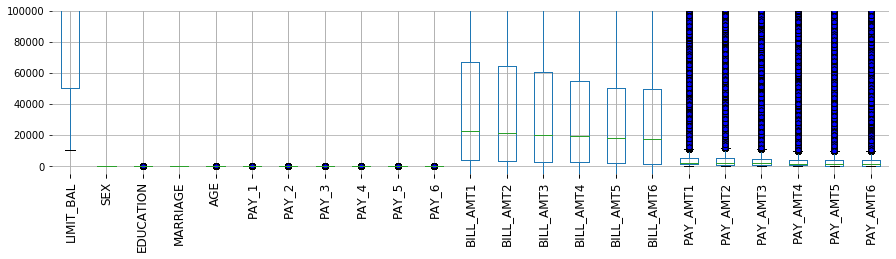

In [59]:
# The features are of different scales and range
features = CardData.drop('Default', axis = 1, inplace = False)
plt.figure(figsize=(15,3))
ax= CardData.drop('Default', axis=1).boxplot(CardData.columns.name, rot=90)
outliers = dict(markerfacecolor='b', marker='p')
ax= features.boxplot(features.columns.name, rot=90, flierprops=outliers)
plt.xticks(size=12)
ax.set_ylim([-5000,100000])
plt.box(False);


Feature Engineering - One Hot Encoding
-------------------

In [10]:
#One Hot Encoding - Converting categorical variables as binary vectors
#Base values : female, other education, other marital status
CD_en1=CardData.copy()
CD_en1['GRAD_SCHOOL'] = (CD_en1['EDUCATION']== 1).astype('int')
CD_en1['UNIVERSITY'] = (CD_en1['EDUCATION']== 2).astype('int')
CD_en1['HIGH_SCHOOL'] = (CD_en1['EDUCATION']== 3).astype('int')
CD_en1.drop('EDUCATION', axis=1, inplace=True)

CD_en1['MALE'] = (CD_en1['SEX']==1).astype('int')
CD_en1.drop('SEX', axis=1, inplace=True)

CD_en1['MARRIED'] = (CD_en1['MARRIAGE']==1).astype('int')
CD_en1['SINGLE'] = (CD_en1['MARRIAGE']==2).astype('int')
CD_en1.drop('MARRIAGE', axis=1, inplace=True)


MACHINE LEARNING MODELS
------
Inorder to predict whether a customer would most likely default in the next month, we will be using different classification algorithms
* Logistic Regression
* Random Forest
* SVM
* Artifical Neural Networks

In [11]:
X_en1= CD_en1.drop('Default',axis=1)
y_en1=CD_en1['Default']

In [12]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X_en1, y_en1, test_size = 0.3, random_state = 0)

In [13]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
sc_y = StandardScaler()
y_train = sc_y.fit_transform(y_train.values.reshape(-1,1))

In [66]:
y_train.shape

(21000, 1)

In [67]:
X_train.shape

(21000, 26)

In [14]:
from sklearn import preprocessing
from sklearn import utils

lab_enc = preprocessing.LabelEncoder()
y_train_encoded = lab_enc.fit_transform(np.ravel(y_train))

Imbalanced Data
---------

In [84]:
#*************************************************************************************************************
#                                      LOGISTIC REGRESSION : Imbalanced
#*************************************************************************************************************
lr = LogisticRegression(solver='liblinear',multi_class='ovr')
start = time()
lr.fit(X_train, np.ravel(y_train_encoded))
end = time()
train_time_log=end-start
print ("Time",train_time_log)
start_t = time()
y_pred = lr.predict(X_test)
end_t = time()
test_time_log=end_t-start_t
roc=roc_auc_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

lrscore = pd.DataFrame([['Logistic Regression', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
print(lrscore)

Time 0.27880072593688965
                 Model  Accuracy  Precision    Recall  F1 Score       ROC
0  Logistic Regression  0.818778   0.678201  0.303093  0.418953  0.631787


In [70]:
#Cross Validation - Logistic Regression
CV_score_LR=cross_val_score(LogisticRegression(solver='liblinear',multi_class='ovr'), X_en1, y_en1,cv=5)
print('cross_val_score: ',CV_score_LR.mean().round(4))
print('cross_val_standard_deviation: ',CV_score_LR.std().round(4))

cross_val_score:  0.7788
cross_val_standard_deviation:  0.0002


In [85]:
#*************************************************************************************************************
#                                           SVM : Imbalanced
#*************************************************************************************************************
svm = SVC(kernel = 'rbf', random_state = 0)
start=time()
svm.fit(X_train, np.ravel(y_train_encoded))
end = time()
train_time_svm=end-start
start_t=time()
y_pred = svm.predict(X_test)
end_t = time()
test_time_svm=end_t-start_t
roc=roc_auc_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
#auc=roc_auc_score(y_test, y_pred)

print("SVM : Training Time", train_time_svm)

svmscore = pd.DataFrame([['SVM', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
print(svmscore)

SVM : Training Time 38.66406178474426
  Model  Accuracy  Precision    Recall  F1 Score      ROC
0   SVM  0.821556   0.667671  0.342784  0.452997  0.64795


In [72]:
# Cross Validation - SVM
CV_score_svm=cross_val_score(SVC(gamma='auto'), X_en1, y_en1,cv=5)
print('cross_val_score: ',CV_score_svm.mean().round(4))
print('cross_val_standard_deviation: ',CV_score_svm.std().round(4))

cross_val_score:  0.7795
cross_val_standard_deviation:  0.0011


In [86]:
#*************************************************************************************************************
#                                        Random Forest - Imbalanced
#*************************************************************************************************************
rf = RandomForestClassifier(n_estimators=40)
start=time()
rf.fit(X_train, np.ravel(y_train_encoded))
end = time()
train_time_rf=end-start
start_t=time()
y_pred = rf.predict(X_test)
end_t = time()
test_time_rf=end_t-start_t
roc=roc_auc_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
#auc=roc_auc_score(y_test, y_pred)
#roc=roc_curve(y_test, y_pred)
print("RF : Training Time", train_time_rf)
rfscore = pd.DataFrame([['Random Forest', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
print(rfscore)

RF : Training Time 2.7515134811401367
           Model  Accuracy  Precision    Recall  F1 Score       ROC
0  Random Forest  0.815222   0.626253  0.354124   0.45242  0.648025


In [77]:
roc=roc_curve(y_test, y_pred)
roc

(array([0.        , 0.05368272, 1.        ]),
 array([0.        , 0.34793814, 1.        ]),
 array([2, 1, 0], dtype=int64))

In [74]:
# Cross Validation - Random Forest
CV_score_rf=cross_val_score(RandomForestClassifier(n_estimators=40),X_en1, y_en1,cv=5)
print('cross_val_score: ',CV_score_rf.mean().round(4))
print('cross_val_standard_deviation: ',CV_score_rf.std().round(4))

cross_val_score:  0.8136
cross_val_standard_deviation:  0.0083


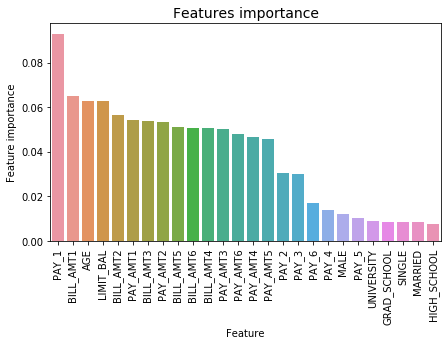

In [189]:
#Feature Importance
cols=X_en1.columns
X_train_df = pd.DataFrame(data=X_train,columns=cols)
tmp=pd.DataFrame({'Feature':X_train_df.columns,'Feature importance':rf.feature_importances_})
tmp=tmp.sort_values(by='Feature importance',ascending= False)
plt.figure(figsize=(7,4))
plt.title('Features importance', fontsize=14)
s=sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()

In [16]:
#********************************************************************************************************
#                              Neural Networks : Imbalanced
#********************************************************************************************************

#ann = MLPClassifier(hidden_layer_sizes=(100,100,100), max_iter=100, alpha=0.0001, solver='sgd', verbose=10, random_state=21, tol=0.000000001)
ann= MLPClassifier(hidden_layer_sizes=(5,10,2),max_iter=100,activation = 'relu',solver='sgd',random_state=1)
start= time()
ann.fit(X_train, np.ravel(y_train_encoded))
end = time()
train_time_nn=end-start
start_t= time()
y_pred = ann.predict(X_test)
end_t = time()
test_time_nn=end_t-start_t
roc=roc_auc_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc=roc_auc_score(y_test, y_pred)
print("Neural Networks : Training Time", train_time_nn)
annscore = pd.DataFrame([['Neural Networks', acc,prec,rec, f1,roc]], 
                        columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])

print(annscore)

Neural Networks : Training Time 7.524958848953247
             Model  Accuracy  Precision    Recall  F1 Score       ROC
0  Neural Networks  0.816889   0.652401  0.322165  0.431332  0.637499


In [88]:
# Cross Validation - Neural Networks
CV_score_ann=cross_val_score(MLPClassifier(hidden_layer_sizes=(5,10,2),max_iter=100,activation = 'relu',solver='sgd',random_state=1),X_en1, y_en1,cv=5)
print('cross_val_score: ',CV_score_ann.mean().round(4))
print('cross_val_standard_deviation: ',CV_score_ann.std().round(4))

cross_val_score:  0.7788
cross_val_standard_deviation:  0.0001


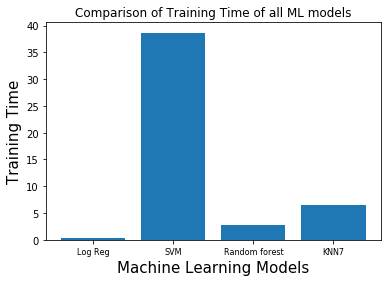

In [88]:
# Comparison of the training time taken by the ML models
model = ['Log Reg', 'SVM', 'Random forest', 'KNN7']
Train_Time = [
    train_time_log,
    train_time_svm,
    train_time_rf,
    train_time_nn
    
]
index = np.arange(len(model))
plt.bar(index, Train_Time)
plt.xlabel('Machine Learning Models', fontsize=15)
plt.ylabel('Training Time', fontsize=15)
plt.xticks(index, model, fontsize=8, )
plt.title('Comparison of Training Time of all ML models')
plt.show()

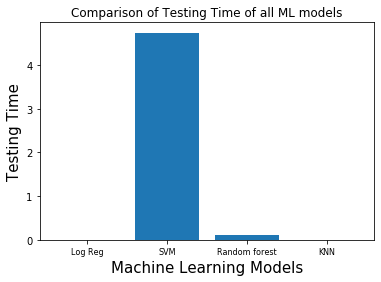

In [89]:
# Comparison of the testing time taken by the ML models
model = ['Log Reg', 'SVM', 'Random forest', 'KNN']
Test_Time = [
    test_time_log,
    test_time_svm,
    test_time_rf,
    test_time_nn
    
]
index = np.arange(len(model))
plt.bar(index, Test_Time)
plt.xlabel('Machine Learning Models', fontsize=15)
plt.ylabel('Testing Time', fontsize=15)
plt.xticks(index, model, fontsize=8, )
plt.title('Comparison of Testing Time of all ML models')
plt.show()

RANDOM UNDER-SAMPLING
-------

In [91]:
#Random Undersampling
print('Original dataset shape %s' % Counter(y_train_encoded))
print('Random under-sampling:')
rus = RandomUnderSampler(random_state=42)
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train_encoded)
print('Resampled dataset shape %s' % Counter(y_train_rus))

Original dataset shape Counter({0: 16304, 1: 4696})
Random under-sampling:
Resampled dataset shape Counter({0: 4696, 1: 4696})


In [92]:
#*************************************************************************************************************
#                                      LOGISTIC REGRESSION : UnderSampled
#*************************************************************************************************************
lr = LogisticRegression(solver='liblinear',multi_class='ovr')
lr.fit(X_train_rus, y_train_rus)
y_pred = lr.predict(X_test)
roc=roc_auc_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

lrscore_u = pd.DataFrame([['Logistic Regression', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
print(lrscore_u)

                 Model  Accuracy  Precision    Recall  F1 Score       ROC
0  Logistic Regression  0.785444   0.502086  0.558247   0.52868  0.703061


In [93]:
#Cross Validation - Logistic Regression
kf= KFold(n_splits=5, random_state=0,shuffle=False)
cv_rus_pipeline= make_pipeline(RandomUnderSampler(random_state=42), LogisticRegression(solver='liblinear'))
CV_score_lr=cross_val_score(cv_rus_pipeline, X_train, y_train_encoded, scoring='accuracy',cv=kf)
print('cross_val_score: ',CV_score_lr.mean().round(4))
print('cross_val_standard_deviation: ',CV_score_lr.std().round(4))

cross_val_score:  0.7745
cross_val_standard_deviation:  0.0085


In [94]:
#*************************************************************************************************************
#                                             SVM :UnderSampled
#*************************************************************************************************************
svm = SVC(kernel = 'rbf', random_state = 0)
svm.fit(X_train_rus, y_train_rus)

y_pred = svm.predict(X_test)
roc=roc_auc_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

svmscore_u = pd.DataFrame([['SVM', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
print(svmscore_u)

  Model  Accuracy  Precision    Recall  F1 Score       ROC
0   SVM  0.776667   0.485056  0.585567  0.530593  0.707373


In [95]:
#Cross Validation - SVM
cv_rus_pipeline= make_pipeline(RandomUnderSampler(random_state=42), SVC(kernel = 'rbf', random_state = 0))
CV_score_svm=cross_val_score(cv_rus_pipeline, X_train, y_train_encoded, scoring='accuracy',cv=kf)
print('cross_val_score: ',CV_score_svm.mean().round(4))
print('cross_val_standard_deviation: ',CV_score_svm.std().round(4))

cross_val_score:  0.7618
cross_val_standard_deviation:  0.0035


In [96]:
#*************************************************************************************************************
#                                        RANDOM FOREST :UnderSampled
#*************************************************************************************************************
rf = RandomForestClassifier(n_estimators=40)
rf.fit(X_train_rus, y_train_rus)
y_pred = rf.predict(X_test)
roc=roc_auc_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

rfscore_u = pd.DataFrame([['Random Forest', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
print(rfscore_u)

           Model  Accuracy  Precision    Recall  F1 Score      ROC
0  Random Forest  0.741778   0.431624  0.624742  0.510531  0.69934


In [97]:
# Cross Validation - Random Forest
cv_rus_pipeline= make_pipeline(RandomUnderSampler(random_state=42), RandomForestClassifier(n_estimators=40))
CV_score_rf=cross_val_score(cv_rus_pipeline, X_train, y_train_encoded, scoring='accuracy',cv=kf)
print('cross_val_score: ',CV_score_rf.mean().round(4))
print('cross_val_standard_deviation: ',CV_score_rf.std().round(4))

cross_val_score:  0.7355
cross_val_standard_deviation:  0.0056


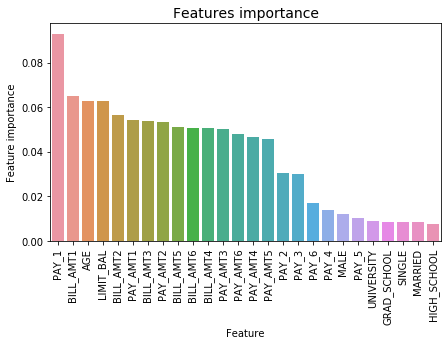

In [188]:
cols=X_en1.columns
X_train_df = pd.DataFrame(data=X_train_rus,columns=cols)
tmp=pd.DataFrame({'Feature':X_train_df.columns,'Feature importance':rf.feature_importances_})
tmp=tmp.sort_values(by='Feature importance',ascending= False)
plt.figure(figsize=(7,4))
plt.title('Features importance', fontsize=14)
s=sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()

In [135]:
#********************************************************************************************************
#                                 Neural Networks : UnderSampled
#********************************************************************************************************
from sklearn.neural_network import MLPClassifier
#ann = MLPClassifier(hidden_layer_sizes=(100,100,100), max_iter=100, alpha=0.0001, solver='sgd', verbose=10, random_state=21, tol=0.000000001)
ann= MLPClassifier(hidden_layer_sizes=(5,10,2),max_iter=100,activation = 'relu',solver='sgd',random_state=1)
ann.fit(X_train_rus, y_train_rus)
y_pred = ann.predict(X_test)
roc=roc_auc_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

annscore_u = pd.DataFrame([['Neural Networks', acc,prec,rec, f1,roc]], 
                        columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])

print(annscore_u)

             Model  Accuracy  Precision    Recall  F1 Score       ROC
0  Neural Networks  0.768667   0.469632  0.565979  0.513324  0.695171


In [136]:
# Cross Validation - Random Forest
ann= MLPClassifier(hidden_layer_sizes=(5,10,2),max_iter=100,activation = 'relu',solver='sgd',random_state=1)
cv_rus_pipeline= make_pipeline(RandomUnderSampler(random_state=42), ann)
CV_score_nn=cross_val_score(cv_rus_pipeline, X_train, y_train_encoded, scoring='accuracy',cv=kf)
print('cross_val_score: ',CV_score_nn.mean().round(4))
print('cross_val_standard_deviation: ',CV_score_nn.std().round(4))

cross_val_score:  0.7691
cross_val_standard_deviation:  0.0086


Random Over-Sampling
------------

In [137]:
#Random Oversampling
print('Original dataset shape %s' % Counter(y_train_encoded))
print('Random over-sampling:')
ros = RandomOverSampler(random_state=0)
X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train_encoded)
print('Resampled dataset shape %s' % Counter(y_train_ros))

Original dataset shape Counter({0: 16304, 1: 4696})
Random over-sampling:
Resampled dataset shape Counter({0: 16304, 1: 16304})


In [138]:
X_train_ros.shape

(32608, 26)

In [139]:
y_train_ros.shape

(32608,)

In [140]:
#*************************************************************************************************************
#                                      LOGISTIC REGRESSION :OVERSAMPLED
#*************************************************************************************************************
lr = LogisticRegression(solver='liblinear')
lr.fit(X_train_ros, y_train_ros)
y_pred = lr.predict(X_test)
roc=roc_auc_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

lrscore_o = pd.DataFrame([['Logistic Regression', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
print(lrscore_o)

                 Model  Accuracy  Precision    Recall  F1 Score       ROC
0  Logistic Regression     0.782   0.495036  0.565464  0.527911  0.703483


In [141]:
#Cross Validation - Logistic Regression
from imblearn.pipeline import Pipeline, make_pipeline
from sklearn.model_selection import KFold
kf= KFold(n_splits=5, random_state=0,shuffle=False)
cv_ros_pipeline= make_pipeline(RandomOverSampler(random_state=42), LogisticRegression(solver='liblinear'))
CV_score_LR=cross_val_score(cv_ros_pipeline, X_train, y_train_encoded, scoring='accuracy',cv=kf)
print('cross_val_score: ',CV_score_LR.mean().round(4))
print('cross_val_standard_deviation: ',CV_score_LR.std().round(4))

cross_val_score:  0.774
cross_val_standard_deviation:  0.0093


In [142]:
#*************************************************************************************************************
#                                             SVM : OVERSAMPLED
#*************************************************************************************************************
svm = SVC(kernel = 'rbf', random_state = 0)
svm.fit(X_train_ros, y_train_ros)

y_pred = svm.predict(X_test)
roc=roc_auc_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

svmscore_o = pd.DataFrame([['SVM', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
print(svmscore_o)

  Model  Accuracy  Precision    Recall  F1 Score       ROC
0   SVM  0.777222   0.485814  0.573711  0.526117  0.703428


In [143]:
#Cross Validation - SVM
kf= KFold(n_splits=5, random_state=0,shuffle=False)
cv_ros_pipeline= make_pipeline(RandomOverSampler(random_state=42), SVC(kernel = 'rbf', random_state = 0))
CV_score_svm=cross_val_score(cv_ros_pipeline, X_train, y_train_encoded, scoring='accuracy',cv=kf)
print('cross_val_score: ',CV_score_svm.mean().round(4))
print('cross_val_standard_deviation: ',CV_score_svm.std().round(4))

cross_val_score:  0.768
cross_val_standard_deviation:  0.0073


In [169]:
#*************************************************************************************************************
#                                        RANDOM FOREST : OVERSAMPLED
#*************************************************************************************************************
rf = RandomForestClassifier(n_estimators=40)
rf.fit(X_train_ros, y_train_ros)
y_pred = rf.predict(X_test)
roc=roc_auc_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

rfscore_o = pd.DataFrame([['Random Forest', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
print(rfscore_o)

           Model  Accuracy  Precision    Recall  F1 Score       ROC
0  Random Forest  0.809667   0.582187  0.414433  0.484192  0.666352


In [145]:
# Cross Validation - Random Forest
kf= KFold(n_splits=5, random_state=0,shuffle=False)
cv_ros_pipeline= make_pipeline(RandomOverSampler(random_state=42), RandomForestClassifier(n_estimators=40))
CV_score_rf=cross_val_score(cv_ros_pipeline, X_train, y_train_encoded, scoring='accuracy',cv=kf)
print('cross_val_score: ',CV_score_rf.mean().round(4))
print('cross_val_standard_deviation: ',CV_score_rf.std().round(4))

cross_val_score:  0.808
cross_val_standard_deviation:  0.0051


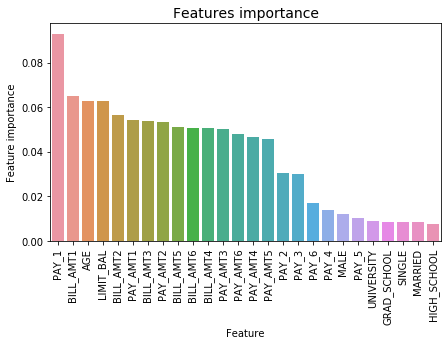

In [170]:
#important Features
cols=X_en1.columns
X_train_ros_df = pd.DataFrame(data=X_train_ros,columns=cols)
X_test_df= pd.DataFrame(data=X_test,columns=cols)
tmp=pd.DataFrame({'Feature':X_train_ros_df.columns,'Feature importance':rf.feature_importances_})
tmp=tmp.sort_values(by='Feature importance',ascending= False)
plt.figure(figsize=(7,4))
plt.title('Features importance', fontsize=14)
s=sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()

In [190]:
#********************************************************************************************************
#                                 NEURAL NETWORKS : OVERSAMPLED
#********************************************************************************************************
from sklearn.neural_network import MLPClassifier
#ann = MLPClassifier(hidden_layer_sizes=(100,100,100), max_iter=100, alpha=0.0001, solver='sgd', verbose=10, random_state=21, tol=0.000000001)
ann= MLPClassifier(hidden_layer_sizes=(5,10,2),max_iter=100,activation = 'relu',solver='sgd',random_state=1)
ann.fit(X_train_ros, y_train_ros)
y_pred = ann.predict(X_test)
roc=roc_auc_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

annscore_o = pd.DataFrame([['Neural Networks', acc,prec,rec
, f1,roc]], 
                        columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])

print(annscore_o)

             Model  Accuracy  Precision    Recall  F1 Score      ROC
0  Neural Networks  0.760333   0.457534  0.602577  0.520133  0.70313


In [191]:
# Cross Validation - Neural Networks
kf= KFold(n_splits=5, random_state=0,shuffle=False)
ann= MLPClassifier(hidden_layer_sizes=(5,10,2),max_iter=100,activation = 'relu',solver='sgd',random_state=1)
cv_ros_pipeline= make_pipeline(RandomOverSampler(random_state=42), ann)
CV_score_nn=cross_val_score(cv_ros_pipeline, X_train, y_train_encoded, scoring='accuracy',cv=kf)
print('cross_val_score: ',CV_score_nn.mean().round(4))
print('cross_val_standard_deviation: ',CV_score_nn.std().round(4))

cross_val_score:  0.7569
cross_val_standard_deviation:  0.012


Over-Sampling : SMOTE
---------

In [192]:
#Smote Oversampling
print('Original dataset shape %s' % Counter(y_train_encoded))
print('SMOTE over-sampling:')
smote= SMOTE(random_state=42)
X_train_sm, y_train_sm= smote.fit_sample(X_train, y_train_encoded)
print('Resampled dataset shape %s' % Counter(y_train_sm))


Original dataset shape Counter({0: 16304, 1: 4696})
SMOTE over-sampling:
Resampled dataset shape Counter({0: 16304, 1: 16304})


In [193]:
y_train_sm.shape

(32608,)

In [194]:
#*************************************************************************************************************
#                                      LOGISTIC REGRESSION : SMOTE
#*************************************************************************************************************
lr = LogisticRegression(random_state=1)
lr.fit(X_train_sm, y_train_sm)
y_pred = lr.predict(X_test)
roc=roc_auc_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

lrscore_sm = pd.DataFrame([['Logistic Regression', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
print(lrscore_sm)

                 Model  Accuracy  Precision    Recall  F1 Score       ROC
0  Logistic Regression  0.782222   0.495512  0.569072   0.52975  0.704933


In [195]:
#Cross Validation - Logistic Regression
kf= KFold(n_splits=5, random_state=0,shuffle=False)
cv_sm_pipeline= make_pipeline(SMOTE(random_state=42), LogisticRegression(random_state=1))
CV_score_LR=cross_val_score(cv_sm_pipeline, X_train, y_train_encoded, scoring='accuracy',cv=kf)
print('cross_val_score: ',CV_score_LR.mean().round(4))
print('cross_val_standard_deviation: ',CV_score_LR.std().round(4))

cross_val_score:  0.7738
cross_val_standard_deviation:  0.0083


In [196]:
#*************************************************************************************************************
#                                             SVM : SMOTE
#*************************************************************************************************************
svm = SVC(gamma='auto')
svm.fit(X_train_sm, y_train_sm)

y_pred = svm.predict(X_test)
roc=roc_auc_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

svmscore_sm = pd.DataFrame([['SVM', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
print(svmscore_sm)

  Model  Accuracy  Precision    Recall  F1 Score      ROC
0   SVM  0.778667   0.488646  0.576804  0.529078  0.70547


In [197]:
#Cross Validation - SVM
cv_sm_pipeline= make_pipeline(SMOTE(random_state=42), SVC(gamma='auto'))
CV_score_svm=cross_val_score(cv_sm_pipeline, X_train, y_train_encoded, scoring='accuracy',cv=kf)
print('cross_val_score: ',CV_score_svm.mean().round(4))
print('cross_val_standard_deviation: ',CV_score_svm.std().round(4))

cross_val_score:  0.7668
cross_val_standard_deviation:  0.0046


In [198]:
#*************************************************************************************************************
#                                            RANDOM FOREST : SMOTE
#*************************************************************************************************************
rf = RandomForestClassifier(n_estimators=40)
rf.fit(X_train_sm, y_train_sm)
y_pred = rf.predict(X_test)
roc=roc_auc_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

rfscore_sm = pd.DataFrame([['Random Forest', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
print(rfscore_sm)

           Model  Accuracy  Precision    Recall  F1 Score       ROC
0  Random Forest  0.791889   0.519579  0.458247   0.48699  0.670908


In [199]:
# Cross Validation - Random Forest
kf= KFold(n_splits=5, random_state=0,shuffle=False)
cv_sm_pipeline= make_pipeline(SMOTE(random_state=42), RandomForestClassifier(n_estimators=40))
CV_score_rf=cross_val_score(cv_sm_pipeline, X_train, y_train_encoded, scoring='accuracy',cv=kf)
print('cross_val_score: ',CV_score_rf.mean().round(4))
print('cross_val_standard_deviation: ',CV_score_rf.std().round(4))

cross_val_score:  0.7908
cross_val_standard_deviation:  0.0029


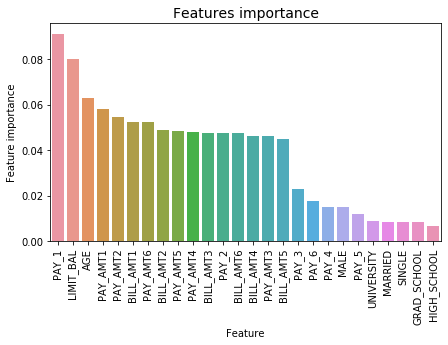

In [205]:
#important Features
cols=X_en1.columns
X_train_sm_df = pd.DataFrame(data=X_train_sm,columns=cols)
X_test_df= pd.DataFrame(data=X_test,columns=cols)
tmp=pd.DataFrame({'Feature':X_train_sm_df.columns,'Feature importance':rf.feature_importances_})
tmp=tmp.sort_values(by='Feature importance',ascending= False)
plt.figure(figsize=(7,4))
plt.title('Features importance', fontsize=14)
s=sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()

In [218]:
X_en1.columns

Index(['LIMIT_BAL', 'AGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5',
       'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'GRAD_SCHOOL', 'UNIVERSITY',
       'HIGH_SCHOOL', 'MALE', 'MARRIED', 'SINGLE'],
      dtype='object')

In [223]:
X_train_sm_fi=X_train_sm_df[['LIMIT_BAL', 'AGE', 'PAY_1', 'PAY_2', 
        'BILL_AMT1', 'BILL_AMT2', 
      'PAY_AMT1', 'PAY_AMT2' ]]
X_test_fi=X_test_df[['LIMIT_BAL', 'AGE', 'PAY_1', 'PAY_2', 
        'BILL_AMT1', 'BILL_AMT2', 
        'PAY_AMT1', 'PAY_AMT2' ]]

In [224]:
rf_fi = RandomForestClassifier(n_estimators=40)
rf_fi.fit(X_train_sm_fi, y_train_sm)
y_pred_fi = rf_fi.predict(X_test_fi)
roc=roc_auc_score(y_test, y_pred_fi)
acc = accuracy_score(y_test, y_pred_fi)
prec = precision_score(y_test, y_pred_fi)
rec = recall_score(y_test, y_pred_fi)
f1 = f1_score(y_test, y_pred_fi)

rfscore_o_fi = pd.DataFrame([['Random Forest', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
print(rfscore_o_fi)

           Model  Accuracy  Precision    Recall  F1 Score       ROC
0  Random Forest  0.779111   0.487355  0.476804  0.482022  0.669493


In [200]:
#********************************************************************************************************
#                                  NEURAL NETWORKS : SMOTE
#********************************************************************************************************
from sklearn.neural_network import MLPClassifier
#ann = MLPClassifier(hidden_layer_sizes=(100,100,100), max_iter=100, alpha=0.0001, solver='sgd', verbose=10, random_state=21, tol=0.000000001)
ann= MLPClassifier(hidden_layer_sizes=(5,10,2),max_iter=100,activation = 'relu',solver='sgd',random_state=1)
ann.fit(X_train_sm, y_train_sm)
y_pred = ann.predict(X_test)
roc=roc_auc_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

annscore_sm = pd.DataFrame([['Neural Networks', acc,prec,rec, f1,roc]], 
                        columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])

print(annscore_sm)

             Model  Accuracy  Precision    Recall  F1 Score       ROC
0  Neural Networks  0.751667   0.444444  0.608247  0.513602  0.699662


In [201]:
# Cross Validation - Neural Networks
ann= MLPClassifier(hidden_layer_sizes=(5,10,2),max_iter=100,activation = 'relu',solver='sgd',random_state=1)
cv_sm_pipeline= make_pipeline(SMOTE(random_state=42), ann)
CV_score_nn=cross_val_score(cv_sm_pipeline, X_train, y_train_encoded, scoring='accuracy',cv=kf)
print('cross_val_score: ',CV_score_nn.mean().round(4))
print('cross_val_standard_deviation: ',CV_score_nn.std().round(4))

cross_val_score:  0.7518
cross_val_standard_deviation:  0.0095


Model Optimization using Grid Search and K-Fold Cross validation
------------------------------------------

In [225]:
kf= KFold(n_splits=5, random_state=0,shuffle=False)

In [228]:
#*************************************************************************************************************
#                         LOGISTIC REGRESSION - GridSearchCV : Imbalanced
#*************************************************************************************************************

logr= LogisticRegression(solver='liblinear')
logr_params = {'C': [10, 20, 30, 40, 50, 60], 'class_weight': [None, 'balanced'],'penalty': ['l1', 'l2']}

#Run 10-fold grid search
grid_obj = GridSearchCV(estimator=logr,param_grid=logr_params,scoring='accuracy',cv=5,n_jobs=-1)
grid_obj = grid_obj.fit(X_train,np.ravel(y_train_encoded))
best_accuracy = grid_obj.best_score_
print('Accuracy on Cross Validation set :',best_accuracy)

#Set the algo to the best combination of parameters
best_parameters = grid_obj.best_params_
print(best_parameters)

y_pred_log = grid_obj.predict(X_test)


roc=roc_auc_score(y_test, y_pred_log)
acc = accuracy_score(y_test, y_pred_log)
prec = precision_score(y_test, y_pred_log)
rec = recall_score(y_test, y_pred_log)
f1 = f1_score(y_test, y_pred_log)


gcv_results =  pd.DataFrame([['Logistic Regression Tuned - Imbalanced', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
print(gcv_results)

Accuracy on Cross Validation set : 0.8152857142857142
{'C': 10, 'class_weight': None, 'penalty': 'l1'}
                                    Model  Accuracy  Precision    Recall  \
0  Logistic Regression Tuned - Imbalanced  0.818778   0.678201  0.303093   

   F1 Score       ROC  
0  0.418953  0.631787  


In [229]:

#*************************************************************************************************************
#                       LOGISTIC REGRESSION - GridSearchCV : UnderSampled
#*************************************************************************************************************


clf = LogisticRegression(solver='liblinear')
params = {'C': [10, 20, 30, 40, 50, 60],'penalty': ['l1', 'l2']}

pipe=make_pipeline(RandomUnderSampler(random_state=42), clf)

params2={'logisticregression__'+key:params[key] for key in params}
grid =GridSearchCV(pipe,param_grid=params2, cv=5, scoring='accuracy', return_train_score=True)
grid = grid.fit(X_train,y_train_encoded)

best_accuracy_rf = grid.best_score_
print('Accuracy on Cross Validation set :',best_accuracy_rf)

best_params = grid.best_params_
print(best_params)

y_pred = grid.predict(X_test)

roc=roc_auc_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)


gcv_results =  pd.DataFrame([['Logistic Regression Tuned - UnderSampled', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
print(gcv_results)

Accuracy on Cross Validation set : 0.7744285714285715
{'logisticregression__C': 10, 'logisticregression__penalty': 'l1'}
                                      Model  Accuracy  Precision    Recall  \
0  Logistic Regression Tuned - UnderSampled  0.785556   0.502317  0.558763   

   F1 Score       ROC  
0  0.529039  0.703319  


In [230]:

#*************************************************************************************************************
#                       LOGISTIC REGRESSION - GridSearchCV : OverSampled
#*************************************************************************************************************


clf = LogisticRegression(solver='liblinear')
params = {'C': [10, 20, 30, 40, 50, 60],'penalty': ['l1', 'l2']}

pipe=make_pipeline(RandomOverSampler(random_state=42), clf)

params2={'logisticregression__'+key:params[key] for key in params}
grid =GridSearchCV(pipe,param_grid=params2, cv=5, scoring='accuracy', return_train_score=True)
grid = grid.fit(X_train,y_train_encoded)

best_accuracy_rf = grid.best_score_
print('Accuracy on Cross Validation set :',best_accuracy_rf)

best_params = grid.best_params_
print(best_params)

y_pred = grid.predict(X_test)

roc=roc_auc_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)


gcv_results =  pd.DataFrame([['Logistic Regression Tuned - OverSampled', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
print(gcv_results)

Accuracy on Cross Validation set : 0.7737142857142858
{'logisticregression__C': 10, 'logisticregression__penalty': 'l1'}
                                     Model  Accuracy  Precision    Recall  \
0  Logistic Regression Tuned - OverSampled  0.781889   0.494831  0.567526   

   F1 Score       ROC  
0  0.528691  0.704159  


In [231]:

#*************************************************************************************************************
#                       LOGISTIC REGRESSION - GridSearchCV : SMOTE
#*************************************************************************************************************


clf = LogisticRegression(solver='liblinear')
params = {'C': [10, 20, 30, 40, 50, 60],'penalty': ['l1', 'l2']}

pipe=make_pipeline(SMOTE(random_state=42), clf)

params2={'logisticregression__'+key:params[key] for key in params}
grid =GridSearchCV(pipe,param_grid=params2, cv=5, scoring='accuracy', return_train_score=True)
grid = grid.fit(X_train,y_train_encoded)

best_accuracy_rf = grid.best_score_
print('Accuracy on Cross Validation set :',best_accuracy_rf)

best_params = grid.best_params_
print(best_params)

y_pred = grid.predict(X_test)

roc=roc_auc_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)


gcv_results =  pd.DataFrame([['Logistic Regression Tuned - SMOTE', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
print(gcv_results)

Accuracy on Cross Validation set : 0.7740952380952381
{'logisticregression__C': 10, 'logisticregression__penalty': 'l2'}
                               Model  Accuracy  Precision    Recall  F1 Score  \
0  Logistic Regression Tuned - SMOTE  0.782222   0.495512  0.569072   0.52975   

        ROC  
0  0.704933  


In [232]:
#****************************************************************************************************************
#                                   RANDOM FOREST - GridSearchCV :Imabalanced
#****************************************************************************************************************

rf = RandomForestClassifier()
rf_params = {'n_estimators': [40,50,60,70,80], 
              'criterion': ['entropy', 'gini'],
              'class_weight' : ['balanced',None]}

grid_rf = GridSearchCV(estimator=rf,param_grid=rf_params,scoring='accuracy',cv=5,n_jobs=-1)
grid_rf = grid_rf.fit(X_train,y_train_encoded)

best_accuracy_rf = grid_rf.best_score_
print('Accuracy on Cross Validation set :',best_accuracy_rf)

best_params = grid_rf.best_params_
print(best_params)

y_pred_rf = grid_rf.predict(X_test)

roc=roc_auc_score(y_test, y_pred_rf)
acc = accuracy_score(y_test, y_pred_rf)
prec = precision_score(y_test, y_pred_rf)
rec = recall_score(y_test, y_pred_rf)
f1 = f1_score(y_test, y_pred_rf)
gcv_results=  pd.DataFrame([['Random Forest Tuned', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
print(gcv_results)

Accuracy on Cross Validation set : 0.8152857142857144
{'class_weight': None, 'criterion': 'entropy', 'n_estimators': 80}
                 Model  Accuracy  Precision    Recall  F1 Score       ROC
0  Random Forest Tuned     0.818   0.638026  0.359794  0.460119  0.651852


In [233]:
#****************************************************************************************************************
#                                   RANDOM FOREST - GridSearchCV :UnderSampled
#****************************************************************************************************************

rf = RandomForestClassifier()
rf_params = {'n_estimators': [40,50,60,70,80], 
              'criterion': ['entropy', 'gini'],
              'class_weight' : ['balanced',None]}

rfo_pipe=make_pipeline(RandomUnderSampler(random_state=42), RandomForestClassifier())

rf_params2={'randomforestclassifier__'+key:rf_params[key] for key in rf_params}
grid_rf =GridSearchCV(rfo_pipe,param_grid=rf_params2, cv=5, scoring='accuracy', return_train_score=True)
grid_rf = grid_rf.fit(X_train,y_train_encoded)

best_accuracy_rf = grid_rf.best_score_
print('Accuracy on Cross Validation set :',best_accuracy_rf)


best_params = grid_rf.best_params_
print(best_params)

y_pred_rf = grid_rf.predict(X_test)

roc=roc_auc_score(y_test, y_pred_rf)
acc = accuracy_score(y_test, y_pred_rf)
prec = precision_score(y_test, y_pred_rf)
rec = recall_score(y_test, y_pred_rf)
f1 = f1_score(y_test, y_pred_rf)
gcv_results=  pd.DataFrame([['Random Forest Tuned : UnderSampled', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
print(gcv_results)


Accuracy on Cross Validation set : 0.7435238095238095
{'randomforestclassifier__class_weight': None, 'randomforestclassifier__criterion': 'entropy', 'randomforestclassifier__n_estimators': 70}
                                Model  Accuracy  Precision    Recall  \
0  Random Forest Tuned : UnderSampled  0.743111   0.433381  0.623711   

   F1 Score       ROC  
0  0.511412  0.699816  


In [234]:
#****************************************************************************************************************
#                                   RANDOM FOREST - GridSearchCV :OverSampled
#****************************************************************************************************************


rf = RandomForestClassifier()
rf_params = {'n_estimators': [40,50,60,70,80], 
              'criterion': ['entropy', 'gini'],
              'class_weight' : ['balanced',None]}

rfo_pipe=make_pipeline(RandomOverSampler(random_state=42), RandomForestClassifier())

rf_params2={'randomforestclassifier__'+key:rf_params[key] for key in rf_params}
grid_rf =GridSearchCV(rfo_pipe,param_grid=rf_params2, cv=kf, scoring='accuracy', return_train_score=True)
grid_rf = grid_rf.fit(X_train,y_train_encoded)

best_accuracy_rf = grid_rf.best_score_
print('Accuracy on Cross Validation set :',best_accuracy_rf)

best_params = grid_rf.best_params_
print(best_params)

y_pred_rf = grid_rf.predict(X_test)

roc=roc_auc_score(y_test, y_pred_rf)
acc = accuracy_score(y_test, y_pred_rf)
prec = precision_score(y_test, y_pred_rf)
rec = recall_score(y_test, y_pred_rf)
f1 = f1_score(y_test, y_pred_rf)
gcv_results=  pd.DataFrame([['Random Forest Tuned : OverSampled', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
print(gcv_results)

Accuracy on Cross Validation set : 0.8093333333333333
{'randomforestclassifier__class_weight': 'balanced', 'randomforestclassifier__criterion': 'entropy', 'randomforestclassifier__n_estimators': 80}
                               Model  Accuracy  Precision    Recall  F1 Score  \
0  Random Forest Tuned : OverSampled  0.809556   0.578691  0.428351  0.492299   

        ROC  
0  0.671328  


In [235]:
#****************************************************************************************************************
#                                   RANDOM FOREST - GridSearchCV :SMOTE
#****************************************************************************************************************
rf = RandomForestClassifier()
rf_params = {'n_estimators': [40,50,60,70,80], 
              'criterion': ['entropy', 'gini'],
              'class_weight' : ['balanced',None]}

rfsm_pipe=make_pipeline(SMOTE(random_state=42), RandomForestClassifier())

rf_params2={'randomforestclassifier__'+key:rf_params[key] for key in rf_params}
grid_rf =GridSearchCV(rfsm_pipe,param_grid=rf_params2, cv=kf, scoring='accuracy', return_train_score=True)
grid_rf = grid_rf.fit(X_train,y_train_encoded)

best_accuracy_rf = grid_rf.best_score_
print('Accuracy on Cross Validation set :',best_accuracy_rf)

best_params = grid_rf.best_params_
print(best_params)

y_pred_rf = grid_rf.predict(X_test)

roc=roc_auc_score(y_test, y_pred_rf)
acc = accuracy_score(y_test, y_pred_rf)
prec = precision_score(y_test, y_pred_rf)
rec = recall_score(y_test, y_pred_rf)
f1 = f1_score(y_test, y_pred_rf)
model=  pd.DataFrame([['Random Forest Tuned : SMOTE', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
gcv_results = gcv_results.append(model, ignore_index = True)
print(gcv_results)

Accuracy on Cross Validation set : 0.7913809523809524
{'randomforestclassifier__class_weight': 'balanced', 'randomforestclassifier__criterion': 'entropy', 'randomforestclassifier__n_estimators': 70}
                               Model  Accuracy  Precision    Recall  F1 Score  \
0  Random Forest Tuned : OverSampled  0.809556   0.578691  0.428351  0.492299   
1        Random Forest Tuned : SMOTE  0.794556   0.526164  0.471649  0.497418   

        ROC  
0  0.671328  
1  0.677468  


In [237]:
#****************************************************************************************************************                                   
#                                   NEURAL NETWORKS - GridSearchCV : Imbalanced
#****************************************************************************************************************

clf= MLPClassifier()
params= {'hidden_layer_sizes': [(10,1),(10,2),(10,3)],
           'alpha': [.0001,.001,.01,.1,1],
            }

grid = GridSearchCV(estimator=clf,param_grid=params,scoring='f1',cv=5,n_jobs=-1)
grid = grid.fit(X_train,y_train_encoded)

best_accuracy = grid.best_score_
print('Accuracy on Cross Validation set :',best_accuracy)

best_params = grid.best_params_
print(best_params)

y_pred = grid.predict(X_test)

roc=roc_auc_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
gcv_results=  pd.DataFrame([['Neural Networks Tuned : Imbalanced', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
print(gcv_results)


Accuracy on Cross Validation set : 0.48173694112900406
{'alpha': 1, 'hidden_layer_sizes': (10, 2)}
                                Model  Accuracy  Precision    Recall  \
0  Neural Networks Tuned : Imbalanced  0.821667   0.654094  0.366495   

   F1 Score       ROC  
0  0.469772  0.656619  


In [57]:
#****************************************************************************************************************                                   
#                                   NEURAL NETWORKS - GridSearchCV : UnderSampled
#****************************************************************************************************************


clf= MLPClassifier()
params= {'hidden_layer_sizes': [(10,1),(10,2),(10,3)],
           'alpha': [.0001,.001,.01,.1,1],
            }

pipe=make_pipeline(RandomUnderSampler(random_state=42), MLPClassifier())

params2={'mlpclassifier__'+key:params[key] for key in params}
grid =GridSearchCV(pipe,param_grid=params2, cv=5, scoring='f1', return_train_score=True)
grid = grid.fit(X_train,y_train_encoded)

best_accuracy_rf = grid.best_score_
print('Accuracy on Cross Validation set :',best_accuracy_rf)

best_params = grid.best_params_
print(best_params)

y_pred = grid.predict(X_test)

roc=roc_auc_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
model=  pd.DataFrame([['Neural Networks Tuned : UnderSampled', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
gcv_results = gcv_results.append(model, ignore_index = True)
print(gcv_results)


Accuracy on Cross Validation set : 0.531820050779831
{'mlpclassifier__alpha': 1, 'mlpclassifier__hidden_layer_sizes': (10, 3)}
                                  Model  Accuracy  Precision    Recall  \
0    Neural Networks Tuned : Imbalanced  0.823889   0.658908  0.379381   
1  Neural Networks Tuned : UnderSampled  0.768667   0.471325  0.601546   

   F1 Score       ROC  
0  0.481518  0.662708  
1  0.528533  0.708068  


In [58]:
#****************************************************************************************************************                                   
#                                   NEURAL NETWORKS - GridSearchCV : OverSampled
#****************************************************************************************************************


clf= MLPClassifier()
params= {'hidden_layer_sizes': [(10,1),(10,2),(10,3)],
           'alpha': [.0001,.001,.01,.1,1],
            }

pipe=make_pipeline(RandomOverSampler(random_state=42), MLPClassifier())

params2={'mlpclassifier__'+key:params[key] for key in params}
grid =GridSearchCV(pipe,param_grid=params2, cv=5, scoring='accuracy', return_train_score=True)
grid = grid.fit(X_train,y_train_encoded)

best_accuracy_rf = grid.best_score_
print('Accuracy on Cross Validation set :',best_accuracy_rf)

best_params = grid.best_params_
print(best_params)

y_pred = grid.predict(X_test)

roc=roc_auc_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
model=  pd.DataFrame([['Neural Networks Tuned : OverSampled', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
gcv_results = gcv_results.append(model, ignore_index = True)
print(gcv_results)


Accuracy on Cross Validation set : 0.7655238095238095
{'mlpclassifier__alpha': 1, 'mlpclassifier__hidden_layer_sizes': (10, 3)}
                                  Model  Accuracy  Precision    Recall  \
0    Neural Networks Tuned : Imbalanced  0.823889   0.658908  0.379381   
1  Neural Networks Tuned : UnderSampled  0.768667   0.471325  0.601546   
2   Neural Networks Tuned : OverSampled  0.771778   0.476582  0.597938   

   F1 Score       ROC  
0  0.481518  0.662708  
1  0.528533  0.708068  
2  0.530407  0.708742  


Accuracy on Cross Validation set : 0.7619047619047619
{'mlpclassifier__alpha': 1, 'mlpclassifier__hidden_layer_sizes': (10, 2)}
                           Model  Accuracy  Precision   Recall  F1 Score  \
0  Neural Networks Tuned : SMOTE     0.771   0.475516  0.60567  0.532759   

       ROC  
0  0.71105  


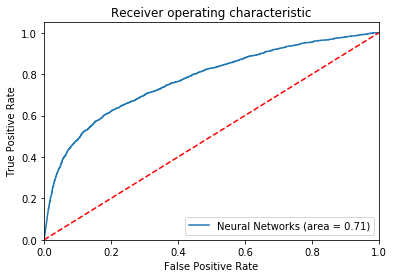

In [17]:
#****************************************************************************************************************                                   
#                                   NEURAL NETWORKS - GridSearchCV : SMOTE
#****************************************************************************************************************


clf= MLPClassifier()
params= {'hidden_layer_sizes': [(10,1),(10,2),(10,3)],
           'alpha': [.0001,.001,.01,.1,1],
            }

pipe=make_pipeline(SMOTE(random_state=42), MLPClassifier())

params2={'mlpclassifier__'+key:params[key] for key in params}
grid =GridSearchCV(pipe,param_grid=params2, cv=5, scoring='accuracy', return_train_score=True)
grid = grid.fit(X_train,y_train_encoded)

best_accuracy_rf = grid.best_score_
print('Accuracy on Cross Validation set :',best_accuracy_rf)

best_params = grid.best_params_
print(best_params)

y_pred = grid.predict(X_test)

roc=roc_auc_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
gcv_results=  pd.DataFrame([['Neural Networks Tuned : SMOTE', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
print(gcv_results)

#ROC CURVE
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
#logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, grid.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Neural Networks (area = %0.2f)' % roc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()


FEATURE SELECTION - Recursive Feature Elimination
-------

In [34]:
#X_fs=X_en1.copy()
#y_fs=y_en1.copy()

In [18]:
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import RFE

In [39]:
#*********************************************************************************************************************
#                       Logistic Regression - RFECV & GridSearchCV
#*********************************************************************************************************************

clf = LogisticRegression(solver='liblinear',multi_class='ovr')
rfecv = RFECV(estimator=clf, step=1, cv=5, scoring='f1')

#param_grid = { 'n_estimators': [200, 500], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth' : [4,5,6,7,8],'criterion' :['gini', 'entropy']}
params = {'estimator__C': [10, 20, 30, 40, 50, 60], 'estimator__class_weight': [None, 'balanced'],'estimator__penalty': ['l1', 'l2']}
#k_fold = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)

X_new = rfecv.fit_transform(X_train, y_train_encoded)

grid = GridSearchCV(estimator=rfecv, param_grid=params, cv= 5, scoring = 'f1')
grid=grid.fit(X_train, y_train_encoded)
print(grid.best_params_)
print(grid.best_score_)
print(grid.best_estimator_)

y_pred = grid.predict(X_test)
roc=roc_auc_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
rfe_gcv=  pd.DataFrame([['Neural Networks Tuned : SMOTE', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])

print(rfe_gcv)
rf= rfecv.fit(X_train, y_train_encoded)
print('Optimal number of features: {}'.format(rf.n_features_))
feat_names=np.array(X_en1.columns)
print("Most important features (RFE) :%s" %feat_names[rf.support_])

{'estimator__C': 10, 'estimator__class_weight': 'balanced', 'estimator__penalty': 'l1'}
0.5300654452955424
RFECV(cv=5,
      estimator=LogisticRegression(C=10, class_weight='balanced', dual=False,
                                   fit_intercept=True, intercept_scaling=1,
                                   l1_ratio=None, max_iter=100,
                                   multi_class='ovr', n_jobs=None, penalty='l1',
                                   random_state=None, solver='liblinear',
                                   tol=0.0001, verbose=0, warm_start=False),
      min_features_to_select=1, n_jobs=None, scoring='f1', step=1, verbose=0)
                           Model  Accuracy  Precision    Recall  F1 Score  \
0  Neural Networks Tuned : SMOTE  0.782111   0.495247  0.563918  0.527356   

        ROC  
0  0.702993  


In [42]:
rf= rfecv.fit(X_train, y_train_encoded)
print('Optimal number of features: {}'.format(rf.n_features_))
feat_names=np.array(X_en1.columns)
print("Most important features (RFE) :%s" %feat_names[rf.support_])

Optimal number of features: 10
Most important features (RFE) :['LIMIT_BAL' 'PAY_1' 'PAY_6' 'BILL_AMT1' 'BILL_AMT3' 'PAY_AMT1' 'PAY_AMT2'
 'GRAD_SCHOOL' 'UNIVERSITY' 'HIGH_SCHOOL']


In [70]:
#*********************************************************************************************************************
#                       Logistic Regression -Imabalanced, RFECV & GridSearchCV
#*********************************************************************************************************************

clf = LogisticRegression(solver='liblinear',multi_class='ovr')
rfecv = RFECV(estimator=clf, step=1, cv=5, scoring='recall')

#param_grid = { 'n_estimators': [200, 500], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth' : [4,5,6,7,8],'criterion' :['gini', 'entropy']}
params = {'estimator__C': [10, 20, 30, 40, 50, 60], 'estimator__class_weight': [None, 'balanced'],'estimator__penalty': ['l1', 'l2']}
#k_fold = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)

X_new = rfecv.fit_transform(X_train, y_train_encoded)

grid = GridSearchCV(estimator=rfecv, param_grid=params, cv= 5, scoring = 'recall')
grid=grid.fit(X_train, y_train_encoded)
print(grid.best_params_)
print(grid.best_score_)
print(grid.best_estimator_)

y_pred = grid.predict(X_test)
roc=roc_auc_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
rfe_gcv=  pd.DataFrame([['Logistic Regression- RFE - GRIDSEARHCV', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])

print(rfe_gcv)
rf= rfecv.fit(X_train, y_train_encoded)
print('Optimal number of features: {}'.format(rf.n_features_))
feat_names=np.array(X_en1.columns)
print("Most important features (RFE) :%s" %feat_names[rf.support_])

{'estimator__C': 10, 'estimator__class_weight': 'balanced', 'estimator__penalty': 'l1'}
0.5775122923889153
RFECV(cv=5,
      estimator=LogisticRegression(C=10, class_weight='balanced', dual=False,
                                   fit_intercept=True, intercept_scaling=1,
                                   l1_ratio=None, max_iter=100,
                                   multi_class='ovr', n_jobs=None, penalty='l1',
                                   random_state=None, solver='liblinear',
                                   tol=0.0001, verbose=0, warm_start=False),
      min_features_to_select=1, n_jobs=None, scoring='recall', step=1,
      verbose=0)
                                    Model  Accuracy  Precision    Recall  \
0  Logistic Regression- RFE - GRIDSEARHCV  0.772778   0.477631  0.577835   

   F1 Score      ROC  
0  0.522976  0.70209  
Optimal number of features: 9
Most important features (RFE) :['PAY_1' 'PAY_6' 'BILL_AMT1' 'BILL_AMT3' 'PAY_AMT1' 'PAY_AMT2'
 'GRAD_SCHOOL' 'UNIV

In [81]:
#*********************************************************************************************************************
#                       Logistic Regression - UnderSampled, RFECV & GridSearchCV
#*********************************************************************************************************************

clf = LogisticRegression(solver='liblinear',multi_class='ovr')
rfecv = RFECV(estimator=clf, step=1, cv=5, scoring='f1')

#param_grid = { 'n_estimators': [200, 500], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth' : [4,5,6,7,8],'criterion' :['gini', 'entropy']}
params = {'estimator__C': [10, 20, 30, 40, 50, 60], 'estimator__class_weight': [None, 'balanced'],'estimator__penalty': ['l1', 'l2']}
#k_fold = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)

X_new = rfecv.fit_transform(X_train_rus, y_train_rus)

grid = GridSearchCV(estimator=rfecv, param_grid=params, cv= 5, scoring = 'f1')
grid=grid.fit(X_train_rus, y_train_rus)
print(grid.best_params_)
print(grid.best_score_)
print(grid.best_estimator_)

y_pred = grid.predict(X_test)
roc=roc_auc_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
rfe_gcv=  pd.DataFrame([['Logistic Regression- RFE - GRIDSEARHCV', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])

print(rfe_gcv)
rf= rfecv.fit(X_train_rus, y_train_rus)
print('Optimal number of features: {}'.format(rf.n_features_))
feat_names=np.array(X_en1.columns)
print("Most important features (RFE) :%s" %feat_names[rf.support_])

{'estimator__C': 10, 'estimator__class_weight': None, 'estimator__penalty': 'l2'}
0.6516756750121457
RFECV(cv=5,
      estimator=LogisticRegression(C=10, class_weight=None, dual=False,
                                   fit_intercept=True, intercept_scaling=1,
                                   l1_ratio=None, max_iter=100,
                                   multi_class='ovr', n_jobs=None, penalty='l2',
                                   random_state=None, solver='liblinear',
                                   tol=0.0001, verbose=0, warm_start=False),
      min_features_to_select=1, n_jobs=None, scoring='f1', step=1, verbose=0)
                                    Model  Accuracy  Precision    Recall  \
0  Logistic Regression- RFE - GRIDSEARHCV  0.785889   0.503016  0.558763   

   F1 Score       ROC  
0  0.529426  0.703532  
Optimal number of features: 24
Most important features (RFE) :['LIMIT_BAL' 'AGE' 'PAY_1' 'PAY_2' 'PAY_3' 'PAY_4' 'PAY_5' 'PAY_6'
 'BILL_AMT1' 'BILL_AMT2' 'BILL_AMT3

In [82]:
#*********************************************************************************************************************
#                       Logistic Regression -OversSampled RFECV & GridSearchCV
#*********************************************************************************************************************

clf = LogisticRegression(solver='liblinear',multi_class='ovr')
rfecv = RFECV(estimator=clf, step=1, cv=5, scoring='f1')

#param_grid = { 'n_estimators': [200, 500], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth' : [4,5,6,7,8],'criterion' :['gini', 'entropy']}
params = {'estimator__C': [10, 20, 30, 40, 50, 60], 'estimator__class_weight': [None, 'balanced'],'estimator__penalty': ['l1', 'l2']}
#k_fold = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)

X_new = rfecv.fit_transform(X_train_ros, y_train_ros)

grid = GridSearchCV(estimator=rfecv, param_grid=params, cv= 5, scoring = 'f1')
grid=grid.fit(X_train_ros, y_train_ros)
print(grid.best_params_)
print(grid.best_score_)
print(grid.best_estimator_)

y_pred = grid.predict(X_test)
roc=roc_auc_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
rfe_gcv=  pd.DataFrame([['Logistic Regression- RFE - GRIDSEARHCV', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])

print(rfe_gcv)
rf= rfecv.fit(X_train_ros, y_train_ros)
print('Optimal number of features: {}'.format(rf.n_features_))
feat_names=np.array(X_en1.columns)
print("Most important features (RFE) :%s" %feat_names[rf.support_])

{'estimator__C': 10, 'estimator__class_weight': 'balanced', 'estimator__penalty': 'l1'}
0.6549952835067523
RFECV(cv=5,
      estimator=LogisticRegression(C=10, class_weight='balanced', dual=False,
                                   fit_intercept=True, intercept_scaling=1,
                                   l1_ratio=None, max_iter=100,
                                   multi_class='ovr', n_jobs=None, penalty='l1',
                                   random_state=None, solver='liblinear',
                                   tol=0.0001, verbose=0, warm_start=False),
      min_features_to_select=1, n_jobs=None, scoring='f1', step=1, verbose=0)
                                    Model  Accuracy  Precision    Recall  \
0  Logistic Regression- RFE - GRIDSEARHCV  0.773889    0.47964  0.576804   

   F1 Score       ROC  
0  0.523754  0.702425  
Optimal number of features: 12
Most important features (RFE) :['LIMIT_BAL' 'PAY_1' 'PAY_3' 'PAY_6' 'BILL_AMT1' 'BILL_AMT2' 'BILL_AMT3'
 'PAY_AMT1' 'PAY_

In [23]:
#*********************************************************************************************************************
#                       Random Forest - RFECV & GridSearchCV
#*********************************************************************************************************************
clf = RandomForestClassifier()
params = {'estimator__n_estimators': [70,80], 
              'estimator__criterion': ['entropy', 'gini'],
              'estimator__class_weight' : ['balanced',None]}


rfecv = RFECV(estimator=clf, step=1, cv=3, scoring='f1')

#param_grid = { 'n_estimators': [200, 500], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth' : [4,5,6,7,8],'criterion' :['gini', 'entropy']}

#k_fold = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)

X_new = rfecv.fit_transform(X_train, y_train_encoded)

grid = GridSearchCV(estimator=rfecv, param_grid=params, cv= 3, scoring = 'f1')
grid=grid.fit(X_train, y_train_encoded)
print(grid.best_params_)
print(grid.best_score_)
print(grid.best_estimator_)

y_pred = grid.predict(X_test)
roc=roc_auc_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
rfe_gcv=  pd.DataFrame([['Random FOrest - RFE - GridSearchCV', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])

print(rfe_gcv)
rf= rfecv.fit(X_train, y_train_encoded)
print('Optimal number of features: {}'.format(rf.n_features_))
feat_names=np.array(X_en1.columns)
print("Most important features (RFE) :%s" %feat_names[rf.support_])

{'estimator__class_weight': None, 'estimator__criterion': 'entropy', 'estimator__n_estimators': 80}
0.4707824355184245
RFECV(cv=3,
      estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                       class_weight=None, criterion='entropy',
                                       max_depth=None, max_features='auto',
                                       max_leaf_nodes=None, max_samples=None,
                                       min_impurity_decrease=0.0,
                                       min_impurity_split=None,
                                       min_samples_leaf=1, min_samples_split=2,
                                       min_weight_fraction_leaf=0.0,
                                       n_estimators=80, n_jobs=None,
                                       oob_score=False, random_state=None,
                                       verbose=0, warm_start=False),
      min_features_to_select=1, n_jobs=None, scoring='f1', step=1, verbose

In [57]:
#Feature Selection for Logistic Regression
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.581085
         Iterations 7
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.162     
Dependent Variable: Default          AIC:              37936.0659
Date:               2020-04-06 04:47 BIC:              38103.9121
No. Observations:   32608            Log-Likelihood:   -18948.   
Df Model:           19               LL-Null:          -22602.   
Df Residuals:       32588            LLR p-value:      0.0000    
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     7.0000                                       
------------------------------------------------------------------
              Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
------------------------------------------------------------------
LIMIT_BAL    -0.1766    0.0153  -11.5364  0.0000  -0.2066  -0.1466
PAY_1         0.6972    0.0162   43.0776  0.0000   0.6655   0.

In [59]:

Ximp=['LIMIT_BAL', 'PAY_1', 'PAY_3', 'PAY_5', 'PAY_6', 'BILL_AMT1',
       'BILL_AMT2', 'BILL_AMT3', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT6', 'GRAD_SCHOOL',
       'UNIVERSITY', 'HIGH_SCHOOL', 'MALE', 'MARRIED']
X=X_train_sm_df[Ximp]
y=y_train_sm_df['Default']

logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.581099
         Iterations 7
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.162     
Dependent Variable: Default          AIC:              37932.9514
Date:               2020-04-06 04:51 BIC:              38084.0130
No. Observations:   32608            Log-Likelihood:   -18948.   
Df Model:           17               LL-Null:          -22602.   
Df Residuals:       32590            LLR p-value:      0.0000    
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     7.0000                                       
------------------------------------------------------------------
              Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
------------------------------------------------------------------
LIMIT_BAL    -0.1756    0.0153  -11.5105  0.0000  -0.2055  -0.1457
PAY_1         0.6976    0.0162   43.1182  0.0000   0.6659   0.

In [60]:
logreg = LogisticRegression()
logreg.fit(X, y)

X_test3=X_test2[Ximp]

y_pred = logreg.predict(X_test3)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test3, y_test2)))

roc=roc_auc_score(y_test2, y_pred)
acc = accuracy_score(y_test2, y_pred)
prec = precision_score(y_test2, y_pred)
rec = recall_score(y_test2, y_pred)
f1 = f1_score(y_test2, y_pred)
lrscore = pd.DataFrame([['Logistic Regression - IMP Features', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
print(lrscore)

Accuracy of logistic regression classifier on test set: 0.78
                                Model  Accuracy  Precision    Recall  \
0  Logistic Regression - IMP Features  0.779889   0.490901  0.570103   

   F1 Score       ROC  
0  0.527546  0.703819  


In [61]:
#Confusion metrics
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test2, y_pred)
print(confusion_matrix)

from sklearn.metrics import classification_report
print(classification_report(y_test2, y_pred))

[[5913 1147]
 [ 834 1106]]
              precision    recall  f1-score   support

           0       0.88      0.84      0.86      7060
           1       0.49      0.57      0.53      1940

    accuracy                           0.78      9000
   macro avg       0.68      0.70      0.69      9000
weighted avg       0.79      0.78      0.79      9000

